# QuIC-AI Test Notebook

This notebook runs through the process for training and testing the models evaluated in the AI-QuIC study.

## Universal Import of Data and Packages

In [1]:
### Import Packages
import importlib as imp
import QuICSeedIF as QuICSeedIF
imp.reload(QuICSeedIF)
import copy
import numpy as np
import tensorflow as tf
from Models import KMeansModel, SVM, MLP

ModuleNotFoundError: No module named 'QuICSeedIF'

In [2]:
### Import Data and Create Objects to Analyze
DATA_DIR = './Data/GrinderClean'
RANDOM_SEED = 7

# Load dataAC
ml_quic = QuICSeedIF.QuICSeedIF()
ml_quic.import_dataset(data_dir=DATA_DIR);
ml_quic.get_dataset_statistics()

Loading Data from ./Data/FPCA_Interp
---- Dataset Label Distribution ----
Negative Samples: 42
False Positive Samples: 30
Positive Samples: 47

---- Well Content Distribution: ----
Data Wells: 119
Control Wells: 0


## Unsupervised
### KMeans

In [3]:
### Add 2 KMeans Models
ml_quic.add_model(KMeansModel.KMeansModel(n_clusters = 3,
                                          file_path= './SavedModels/Raw/', model_name='kmeans'
                                          ), model_name='KMeans Raw', data_type='raw', tag='Unsupervised')

ml_quic.add_model(KMeansModel.KMeansModel(n_clusters = 3,
                                          file_path= './SavedModels/Analysis/', model_name='kmeans'
                                          ), model_name='KMeans Metrics', data_type='analysis', tag='Unsupervised')


KMeans Model Loaded:
<class 'sklearn.cluster._kmeans.KMeans'>

KMeans Model Loaded:
<class 'sklearn.cluster._kmeans.KMeans'>


## Supervised Models

### SVM

In [5]:
### SVM
ml_quic.add_model(SVM.SVM(
    file_path='./SavedModels/Raw/', model_name='svm'
    ), model_name = 'SVM Raw', data_type = 'raw', tag = 'Supervised')

ml_quic.add_model(SVM.SVM(file_path='./SavedModels/Analysis/', model_name='svm'), model_name = 'SVM Metrics', data_type = 'analysis', tag = 'Supervised')


SVM Model Loaded:
<class 'sklearn.svm._classes.SVC'>

SVM Model Loaded:
<class 'sklearn.svm._classes.SVC'>


### MLP

In [6]:
### MLP
ml_quic.add_model(MLP.MLP(NDIM = ml_quic.get_num_timesteps_raw(), 
                          file_path='./SavedModels/Raw/', model_name='mlp'
                          ), model_name = 'MLP Raw', data_type = 'raw', tag='Supervised')

KeyboardInterrupt: 

## Training and Evaluation

### Training

In [ ]:
### Train Models
ml_quic.separate_train_test(tags=['Unsupervised', 'Supervised'], train_type=0, test_size=0.20)
ml_quic.train_models(tags=['Unsupervised', 'Supervised'])

### Unsupervised Evaluation

In [ ]:
### Get Plots and Scores for Unsupervised Models
ml_quic.get_model_scores(tags=['Unsupervised'])
ml_quic.evaluate_fp_performance(tags=['Unsupervised'])
ml_quic.get_model_plots(tags=['Unsupervised'])

KMeans Raw:
              precision    recall  f1-score   support

         neg       0.78      1.00      0.88        72
         pos       1.00      0.57      0.73        47

    accuracy                           0.83       119
   macro avg       0.89      0.79      0.80       119
weighted avg       0.87      0.83      0.82       119

KMeans Metrics:
              precision    recall  f1-score   support

         neg       1.00      0.58      0.74        72
         pos       0.61      1.00      0.76        47

    accuracy                           0.75       119
   macro avg       0.81      0.79      0.75       119
weighted avg       0.85      0.75      0.75       119

Spectral Raw:
              precision    recall  f1-score   support

         neg       0.88      0.42      0.57        72
         pos       0.51      0.91      0.65        47

    accuracy                           0.61       119
   macro avg       0.69      0.67      0.61       119
weighted avg       0.73      0.6

c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


IndexError: index 0 is out of bounds for axis 0 with size 0

### Supervised Evaluation

SVM Raw:
              precision    recall  f1-score   support

         neg       0.96      0.96      0.96        72
         pos       0.94      0.94      0.94        47

    accuracy                           0.95       119
   macro avg       0.95      0.95      0.95       119
weighted avg       0.95      0.95      0.95       119

SVM Metrics:
              precision    recall  f1-score   support

         neg       1.00      0.58      0.74        72
         pos       0.61      1.00      0.76        47

    accuracy                           0.75       119
   macro avg       0.81      0.79      0.75       119
weighted avg       0.85      0.75      0.75       119

4/4 [==============================] - 1s 2ms/step
MLP Raw:
              precision    recall  f1-score   support

         neg       0.79      0.83      0.81        72
         pos       0.72      0.66      0.69        47

    accuracy                           0.76       119
   macro avg       0.76      0.75      0.75   

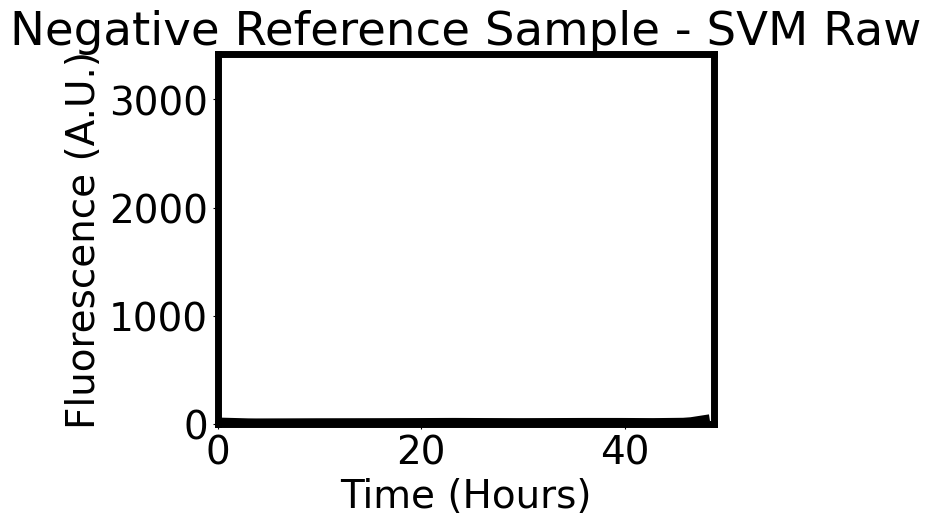

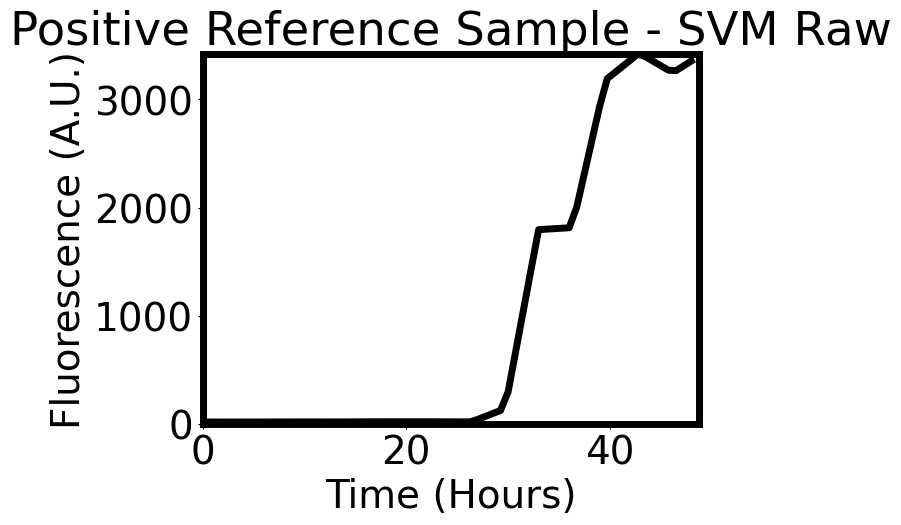

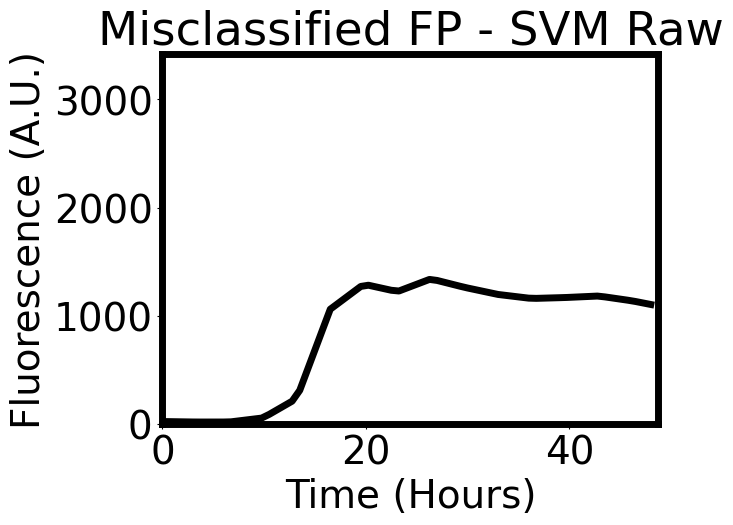

-------- Results on False Positives for SVM Metrics --------
Accuracy on False Positives: 0.0
False Positives Account for 100.00% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 80.0
Average RAF: 0.012731481666666667
Average MPR: 58.07766025
Average MS: 85.75509166666666
Correctly Classified FP Characteristics:
Average Time to Threshold: nan
Average RAF: nan
Average MPR: nan
Average MS: nan


c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


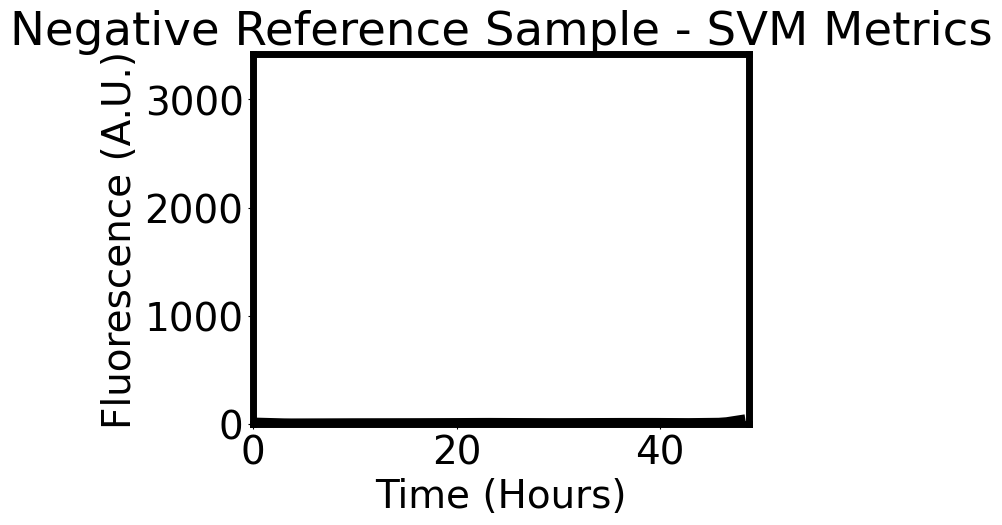

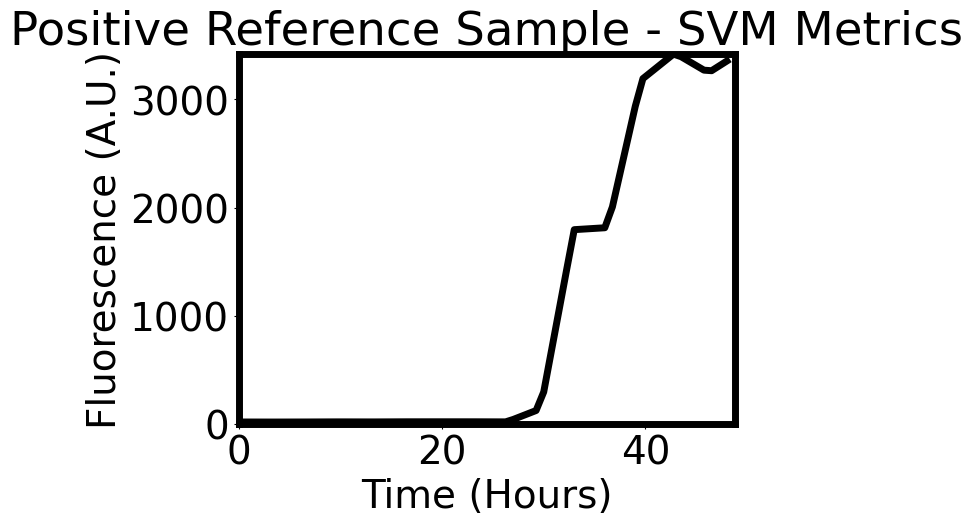

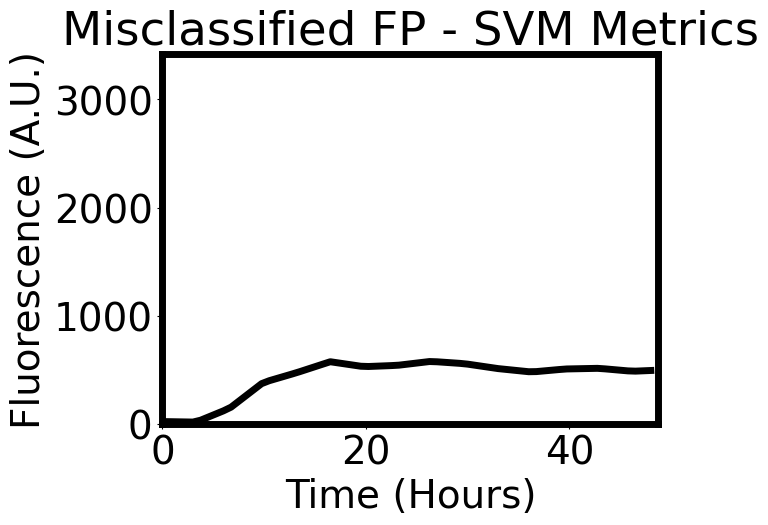

-------- Results on False Positives for MLP Raw --------
4/4 [==============================] - 0s 6ms/step
Accuracy on False Positives: 0.6
False Positives Account for 42.86% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 76.0
Average RAF: 0.01331018533333333
Average MPR: 75.45389083166667
Average MS: 108.542425
Correctly Classified FP Characteristics:
Average Time to Threshold: 82.66666666666667
Average RAF: 0.01234567922222222
Average MPR: 46.493506528888894
Average MS: 70.5635361111111


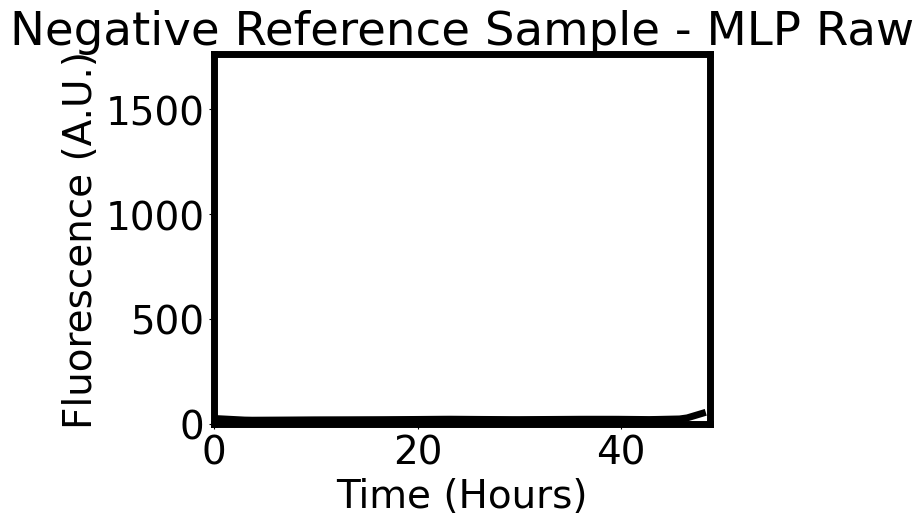

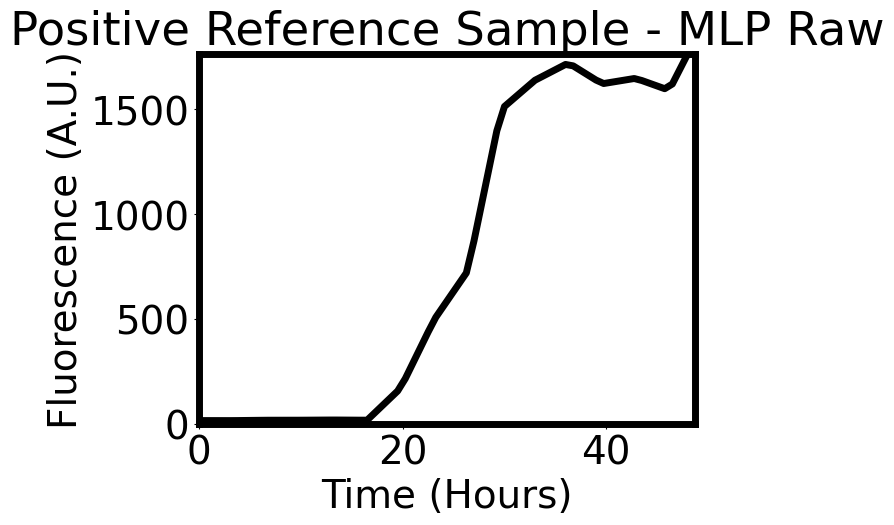

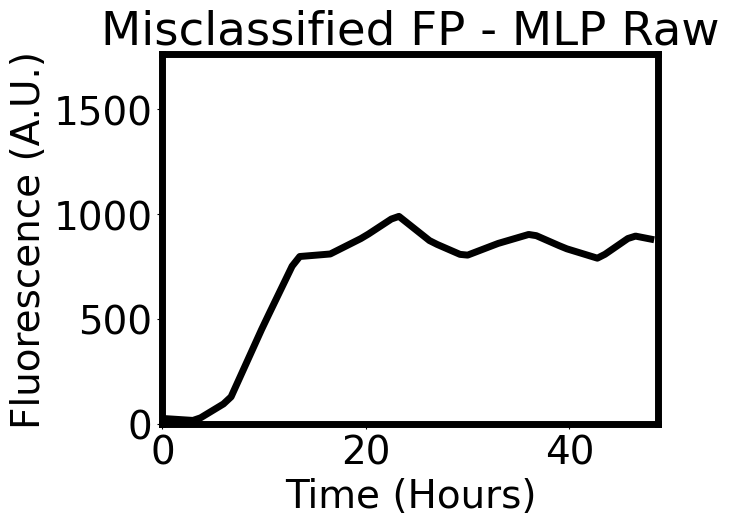

-------- Positive Characteristics for Reference --------
Time To Threshold:
	Min: 24, Average: 185.36170212765958, Max: 288
RAF:
	Min: 0.003472222, Average: 0.0065814553404255315, Max: 0.041666667
MPR:
	Min: 5.291572184, Average: 227.37823307093618, Max: 388.5155263
MS:
	Min: 174.054, Average: 357.369909574468, Max: 522.4207
4/4 [==============================] - 0s 4ms/step


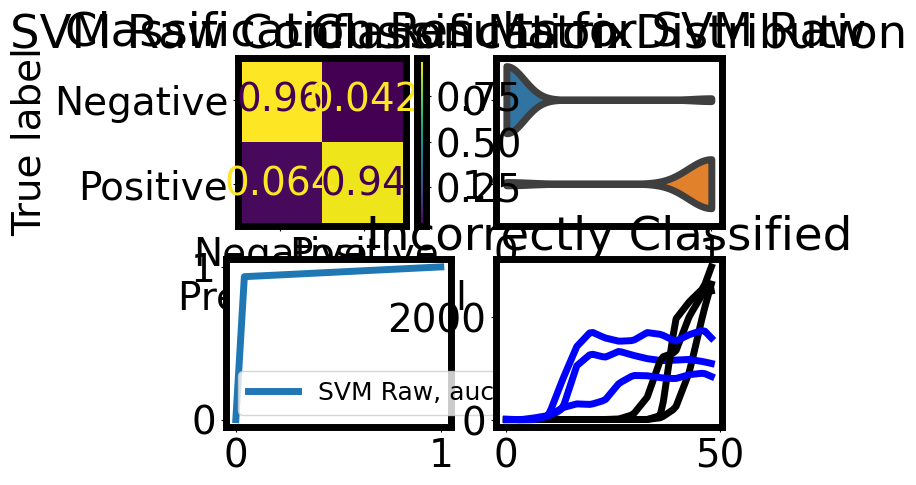

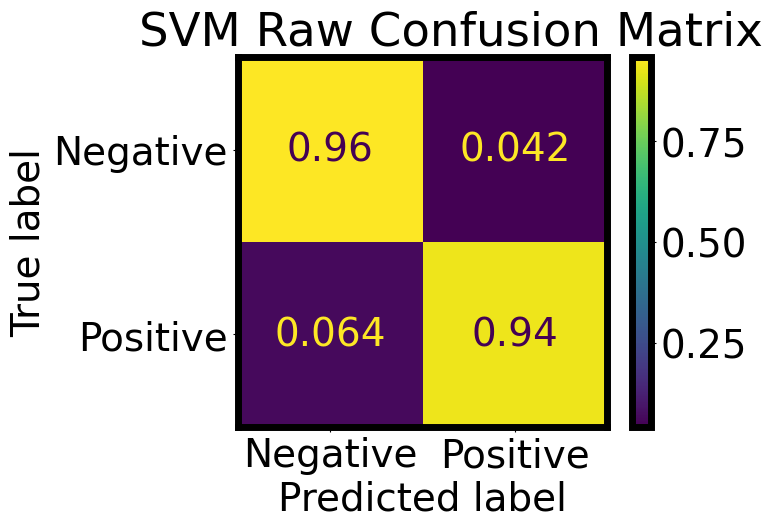

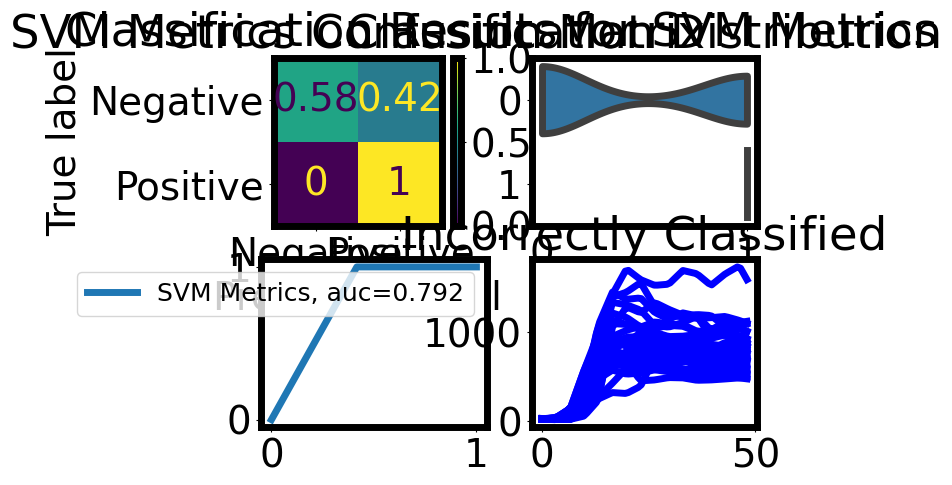

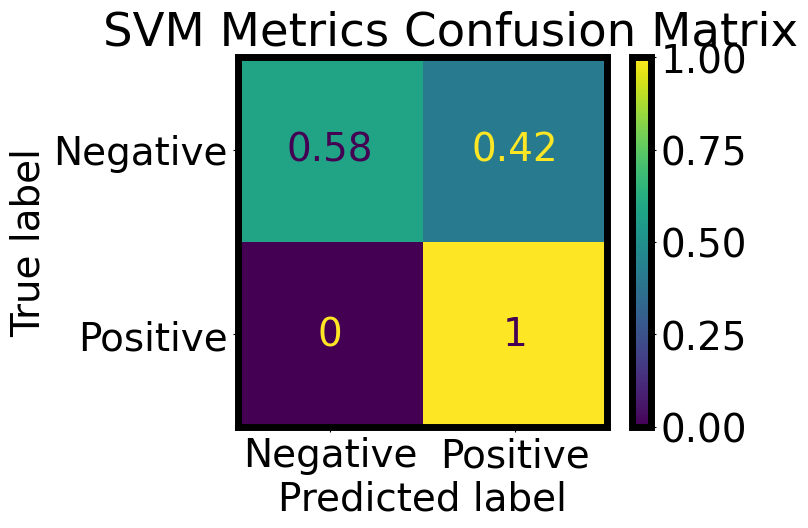

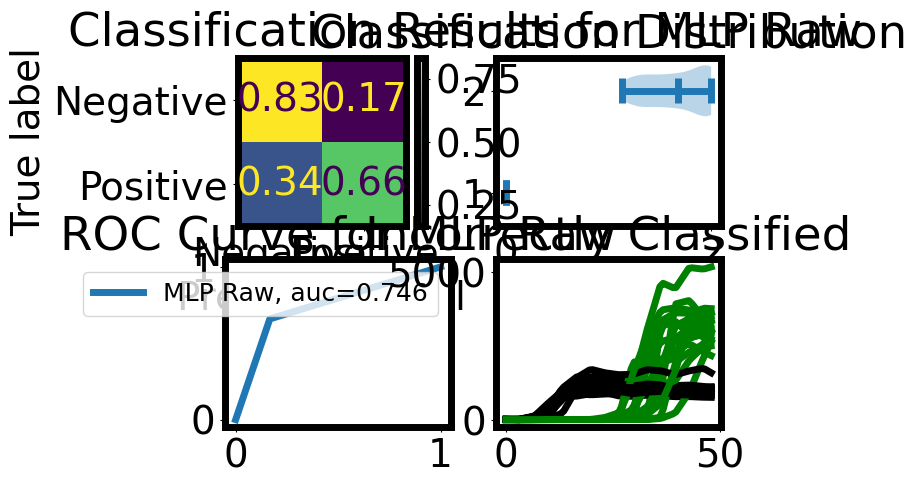

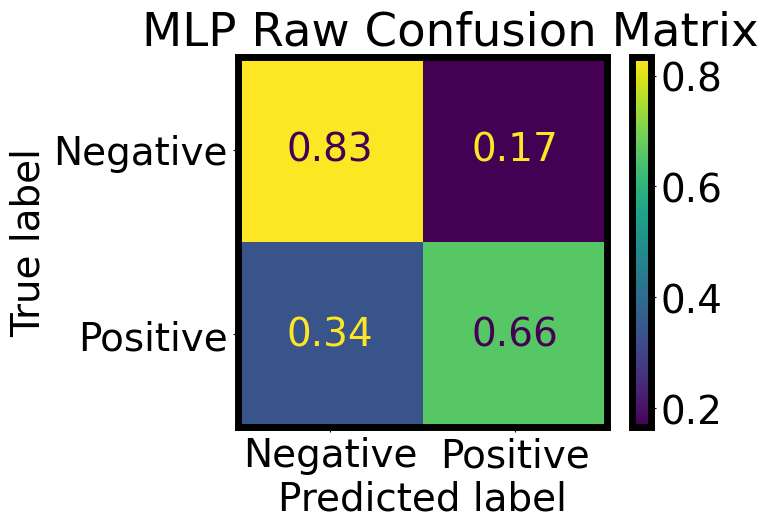

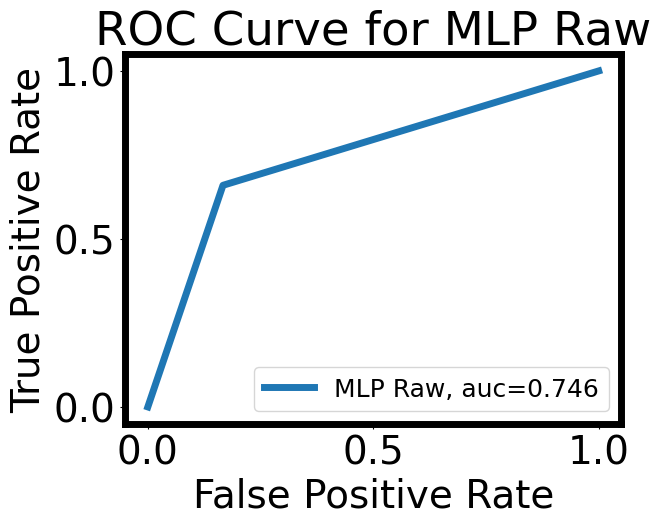

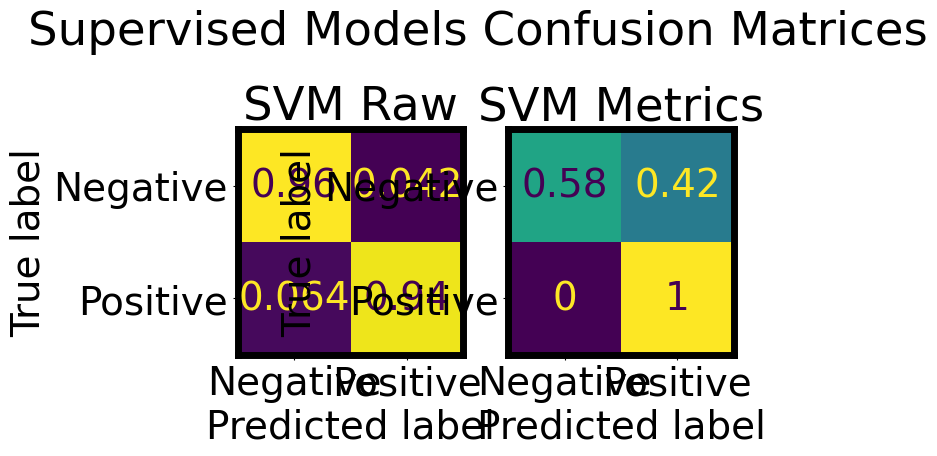

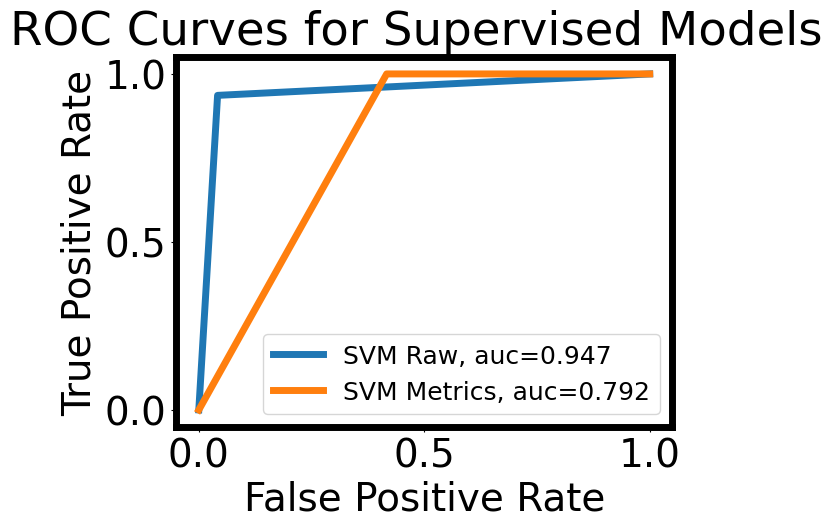

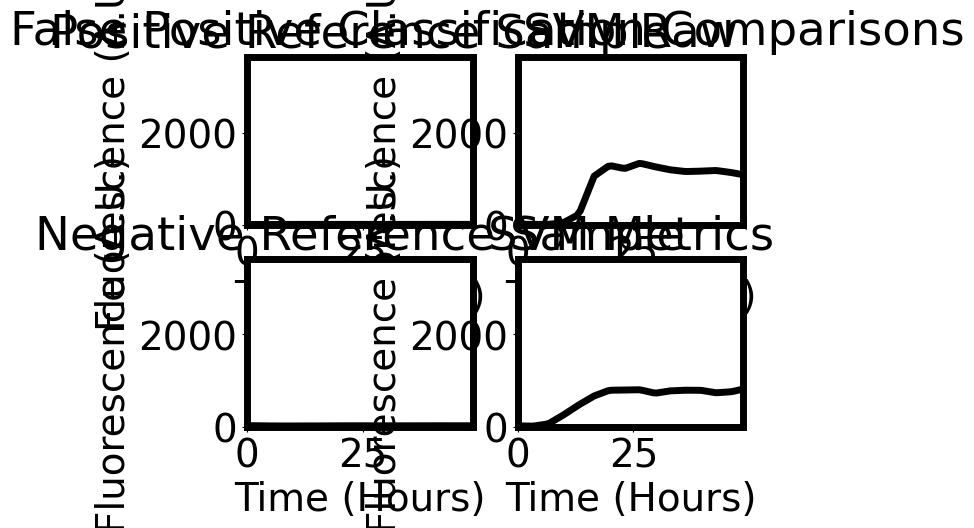

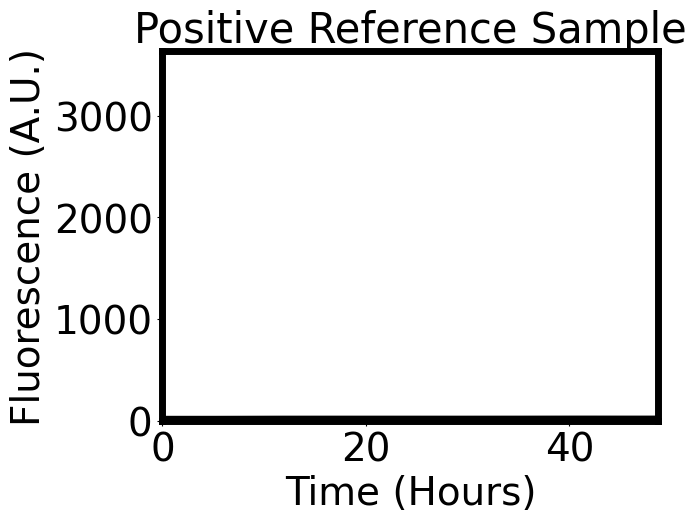

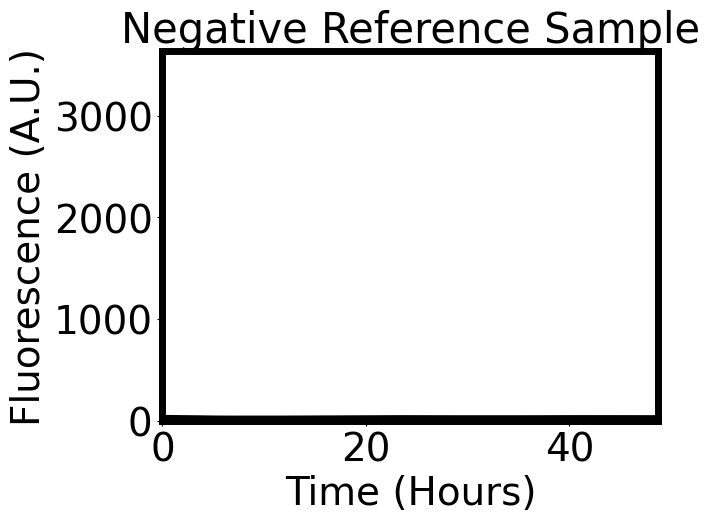

In [ ]:
### Get Supervised Scores and Plots
ml_quic.get_model_scores(tags = ['Supervised'])
ml_quic.evaluate_fp_performance(tags=['Supervised'])
ml_quic.get_model_plots(tags=['Supervised'])

### G-Well Evaluation

In [ ]:
### Test on G Wells
ml_quic = ml_quic = QuICSeedIF.QuICSeedIF()
ml_quic.import_dataset(data_dir='./Data/GrinderGWells')
ml_quic.get_dataset_statistics()

ml_quic.add_model(KMeansModel.KMeansModel(n_clusters = 3,
                                          file_path= './SavedModels/Analysis/', model_name='kmeans'
                                          ), model_name='KMeans Metrics', data_type='analysis', tag='Unsupervised')

ml_quic.add_model(SVM.SVM(
    file_path='./SavedModels/Raw/', model_name='svm'
    ), model_name = 'SVM Raw', data_type = 'raw', tag = 'Supervised')

ml_quic.add_model(SVM.SVM(
    file_path='./SavedModels/Analysis/', model_name='svm'
    ), model_name = 'SVM Metrics', data_type = 'analysis', tag = 'Supervised')

ml_quic.add_model(MLP.MLP(NDIM = ml_quic.get_num_timesteps_raw(), 
                          file_path='./SavedModels/Raw/', model_name='mlp'
                          ), model_name = 'MLP Raw', data_type = 'raw', tag='Supervised')

ml_quic.separate_train_test(tags=['Supervised', 'Unsupervised'], train_type=3, file_loc='./TrainTest/GWells')

### Get Supervised Scores and Plots
ml_quic.get_model_scores(tags = ['Supervised', 'Unsupervised'])

pred_km, sample_list_km = ml_quic.evaluate_replicate_performance(model='KMeans Metrics')
pred_svm_r, sample_list_svmr = ml_quic.evaluate_replicate_performance(model='SVM Raw')
pred_svm_m, sample_list_svmm = ml_quic.evaluate_replicate_performance(model='SVM Metrics')
pred_mlp, sample_list_mlp = ml_quic.evaluate_replicate_performance(model='MLP Raw')

print('Model Sample Predictions:')
print('\n{:20s} {:20s} {:20s} {:20s} {:20s}'.format('Sample:', 'KMeans Metrics:', 'SVM Raw:', 'SVM Metrics:', 'MLP Raw:'))
for i in range(len(pred_km)):
    if sample_list_km[i] != sample_list_mlp[i] or sample_list_mlp[i] != sample_list_svmm[i] or sample_list_svmm[i] != sample_list_svmr[i]:
        raise Exception('Sample order does not agree!')
    print('{:20s} {:20s} {:20s} {:20s} {:20s}'.format(sample_list_km[i], pred_km[i], pred_svm_r[i], pred_svm_m[i], pred_mlp[i]))


Loading Data from ./Data/GrinderGWells
---- Dataset Label Distribution ----
Negative Samples: 208
False Positive Samples: 0
Positive Samples: 96

---- Well Content Distribution: ----
Data Wells: 304
Control Wells: 0

KMeans Model Loaded:
<class 'sklearn.cluster._kmeans.KMeans'>

SVM Model Loaded:
<class 'sklearn.svm._classes.SVC'>

SVM Model Loaded:
<class 'sklearn.svm._classes.SVC'>
\MLP Model Loaded:
<class 'keras.engine.functional.Functional'>
SVM Raw:
              precision    recall  f1-score   support

         neg       0.86      1.00      0.93       208
         pos       1.00      0.66      0.79        96

    accuracy                           0.89       304
   macro avg       0.93      0.83      0.86       304
weighted avg       0.91      0.89      0.88       304

SVM Metrics:
              precision    recall  f1-score   support

         neg       0.91      1.00      0.95       208
         pos       1.00      0.78      0.88        96

    accuracy                        

c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\metrics\_classification.py:1592: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\metrics\_classification.py:1592: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\metrics\_classification.py:1592: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(tru

1/1 [==============================] - ETA: 0s

c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\metrics\_classification.py:1592: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\metrics\_classification.py:1592: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\metrics\_classification.py:1592: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(tru

1/1 [==============================] - 0s 11ms/step
Model Sample Predictions:

Sample:              KMeans Metrics:      SVM Raw:             SVM Metrics:         MLP Raw:            
49G                  4/8                  2/8                  3/8                  3/8                 
49Gx01               0/8                  0/8                  0/8                  0/8                 
14G                  1/8                  0/8                  1/8                  0/8                 
14Gx01               1/8                  0/8                  0/8                  0/8                 
92G                  0/8                  0/8                  0/8                  0/8                 
92Gx01               5/8                  4/8                  4/8                  4/8                 
98G                  0/8                  0/8                  0/8                  0/8                 
98Gx01               4/8                  2/8                  3/8               

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 2 has 2 dimension(s)

## Validation Data Analysis

In [ ]:
### Test on Unrelated Data
ml_quic = ml_quic = QuICSeedIF.QuICSeedIF()
ml_quic.import_dataset(data_dir='./Data/ValidationData')
ml_quic.get_dataset_statistics()

ml_quic.add_model(KMeansModel.KMeansModel(n_clusters = 3,
                                          file_path= './SavedModels/Raw/', model_name='kmeans'
                                          ), model_name='KMeans Raw', data_type='raw', tag='Unsupervised')
ml_quic.add_model(KMeansModel.KMeansModel(n_clusters = 3,
                                          file_path= './SavedModels/Analysis/', model_name='kmeans'
                                          ), model_name='KMeans Metrics', data_type='analysis', tag='Unsupervised')

ml_quic.add_model(SVM.SVM(
    file_path='./SavedModels/Raw/', model_name='svm'
    ), model_name = 'SVM Raw', data_type = 'raw', tag = 'Supervised')

ml_quic.add_model(SVM.SVM(
    file_path='./SavedModels/Analysis/', model_name='svm'
    ), model_name = 'SVM Metrics', data_type = 'analysis', tag = 'Supervised')

ml_quic.add_model(MLP.MLP(NDIM = ml_quic.get_num_timesteps_raw(), 
                          file_path='./SavedModels/Raw/', model_name='mlp'
                          ), model_name = 'MLP Raw', data_type = 'raw', tag='Supervised')

ml_quic.separate_train_test(tags=['Supervised', 'Unsupervised'], train_type=3, file_loc='./TrainTest/Val_Data')

### Get Supervised Scores and Plots
ml_quic.evaluate_fp_performance(tags=['Unsupervised', 'Supervised'], file_loc='./FiguresVal/')
ml_quic.get_model_scores(tags = ['Unsupervised', 'Supervised'])
ml_quic.get_model_plots(tags=['Unsupervised', 'Supervised'], file_loc='./FiguresVal/')

## Feature Threshold Analysis
### Selecting Most Important Time Steps

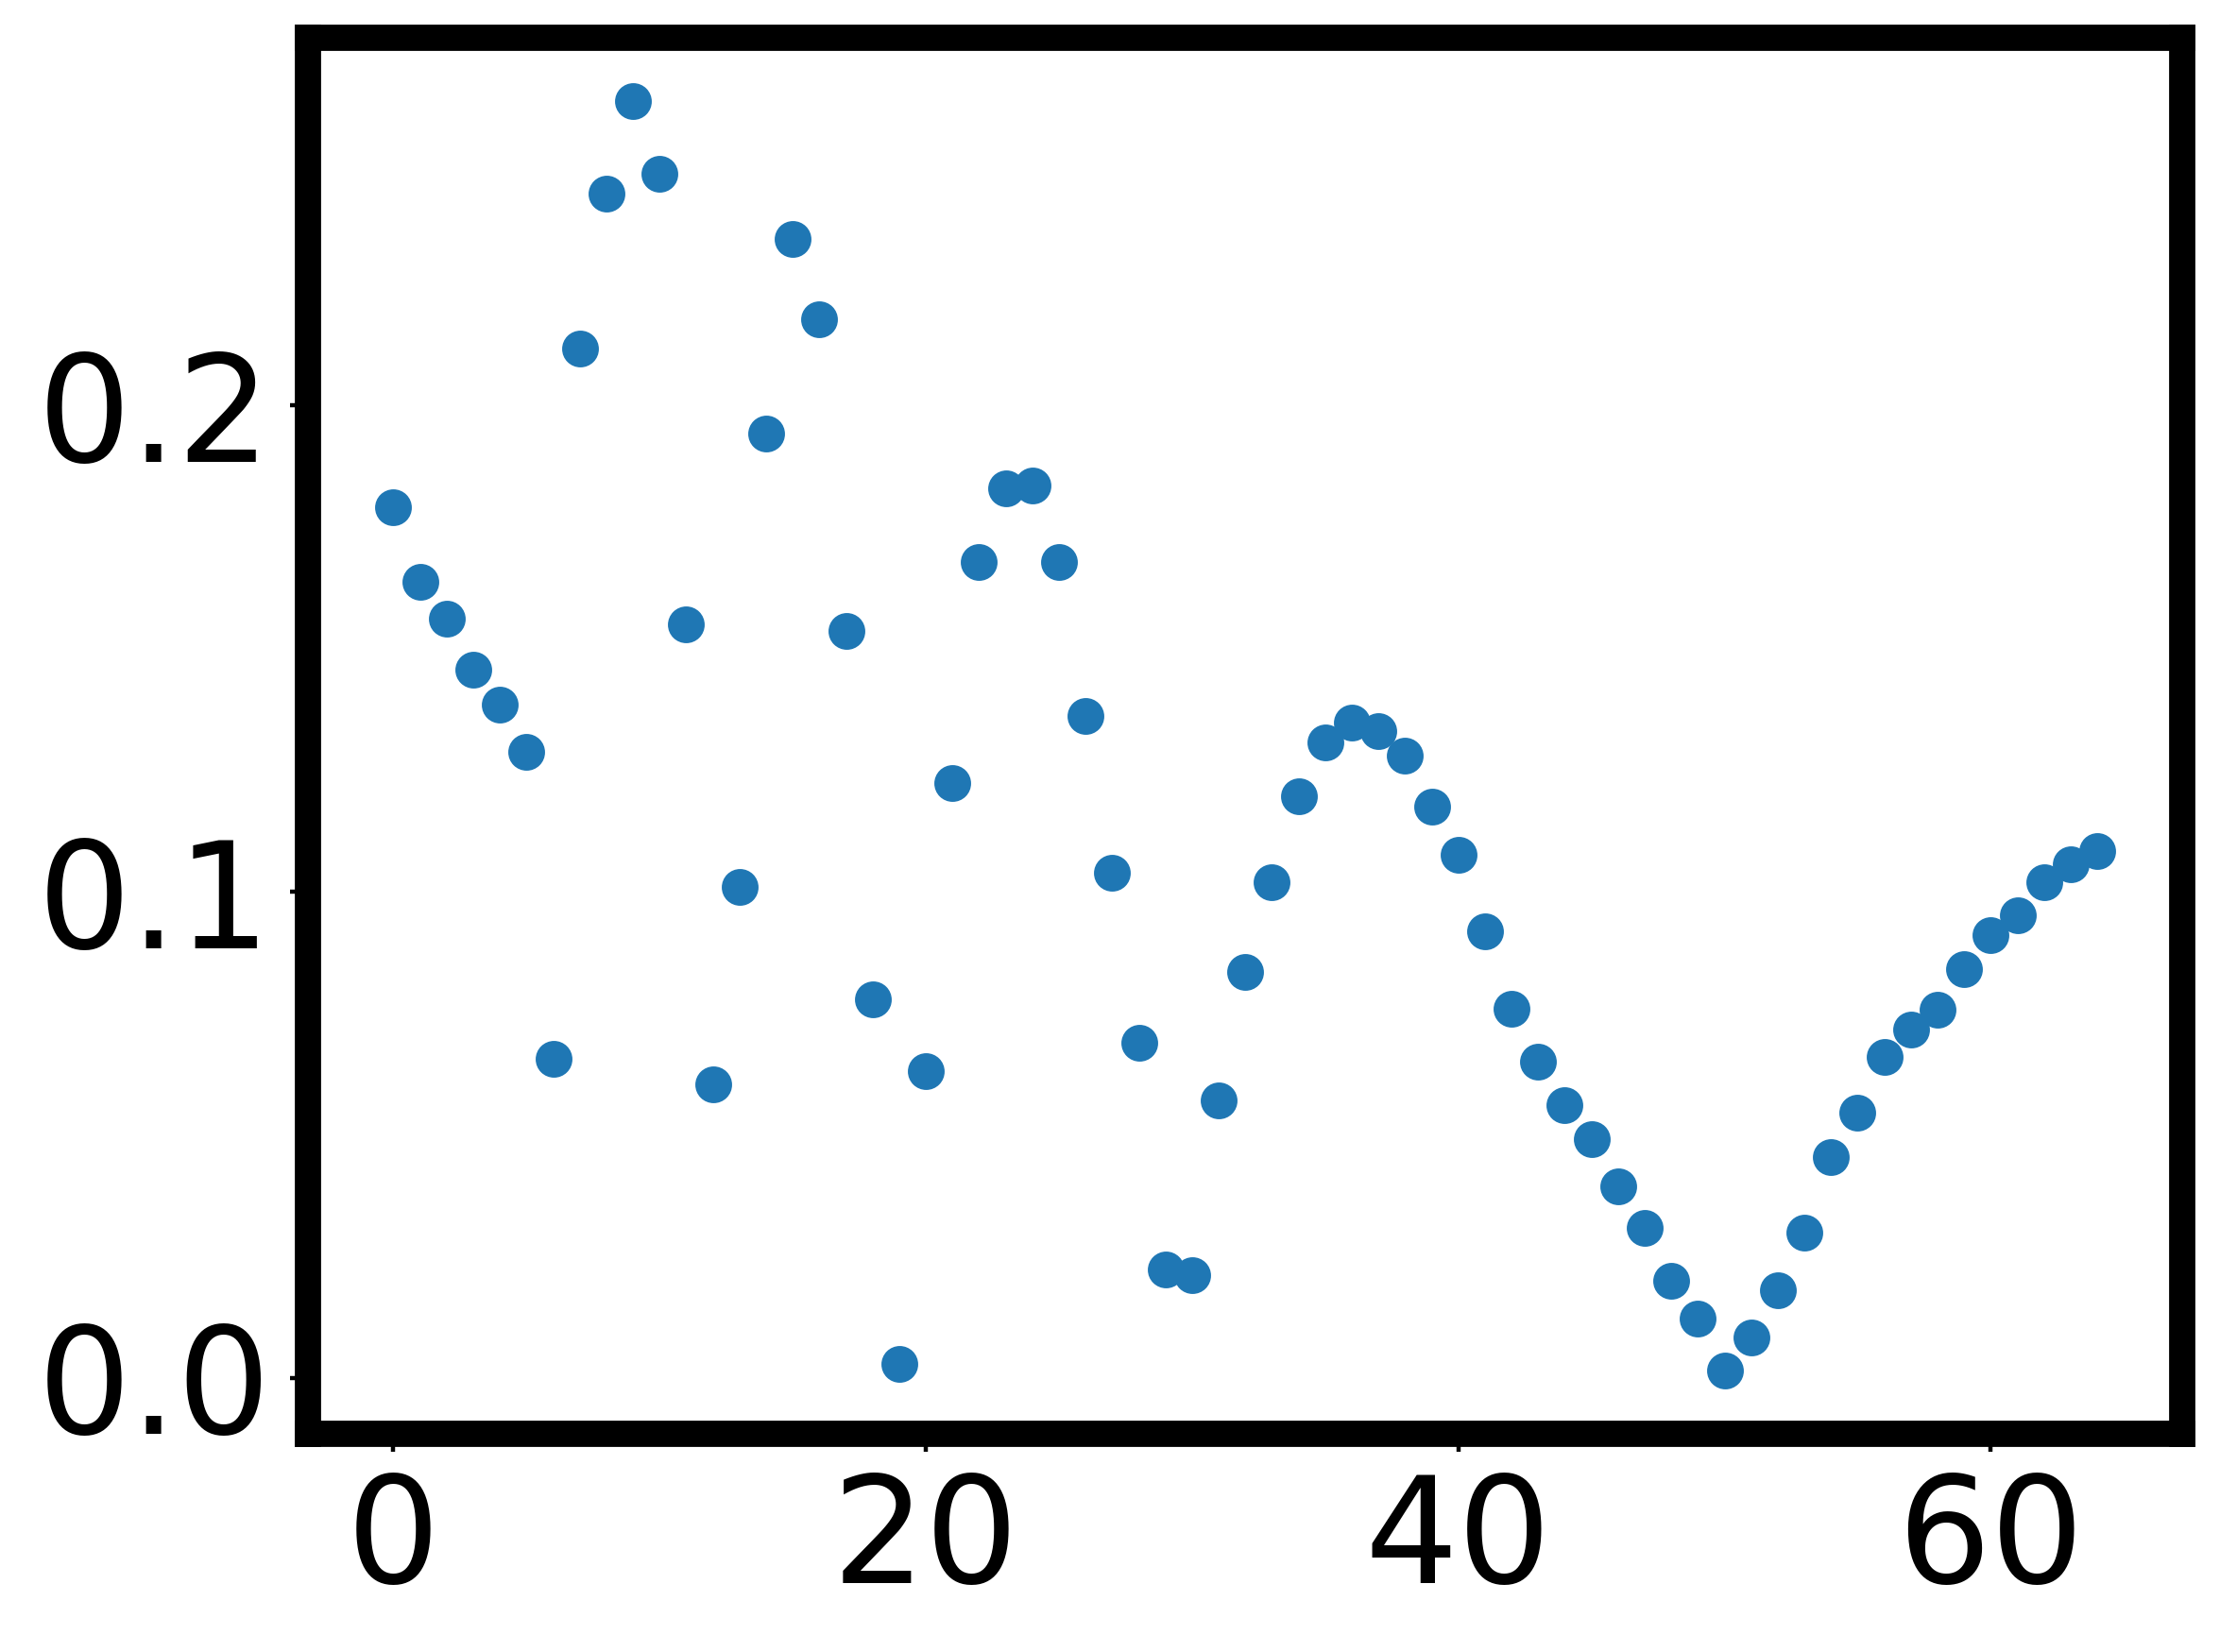

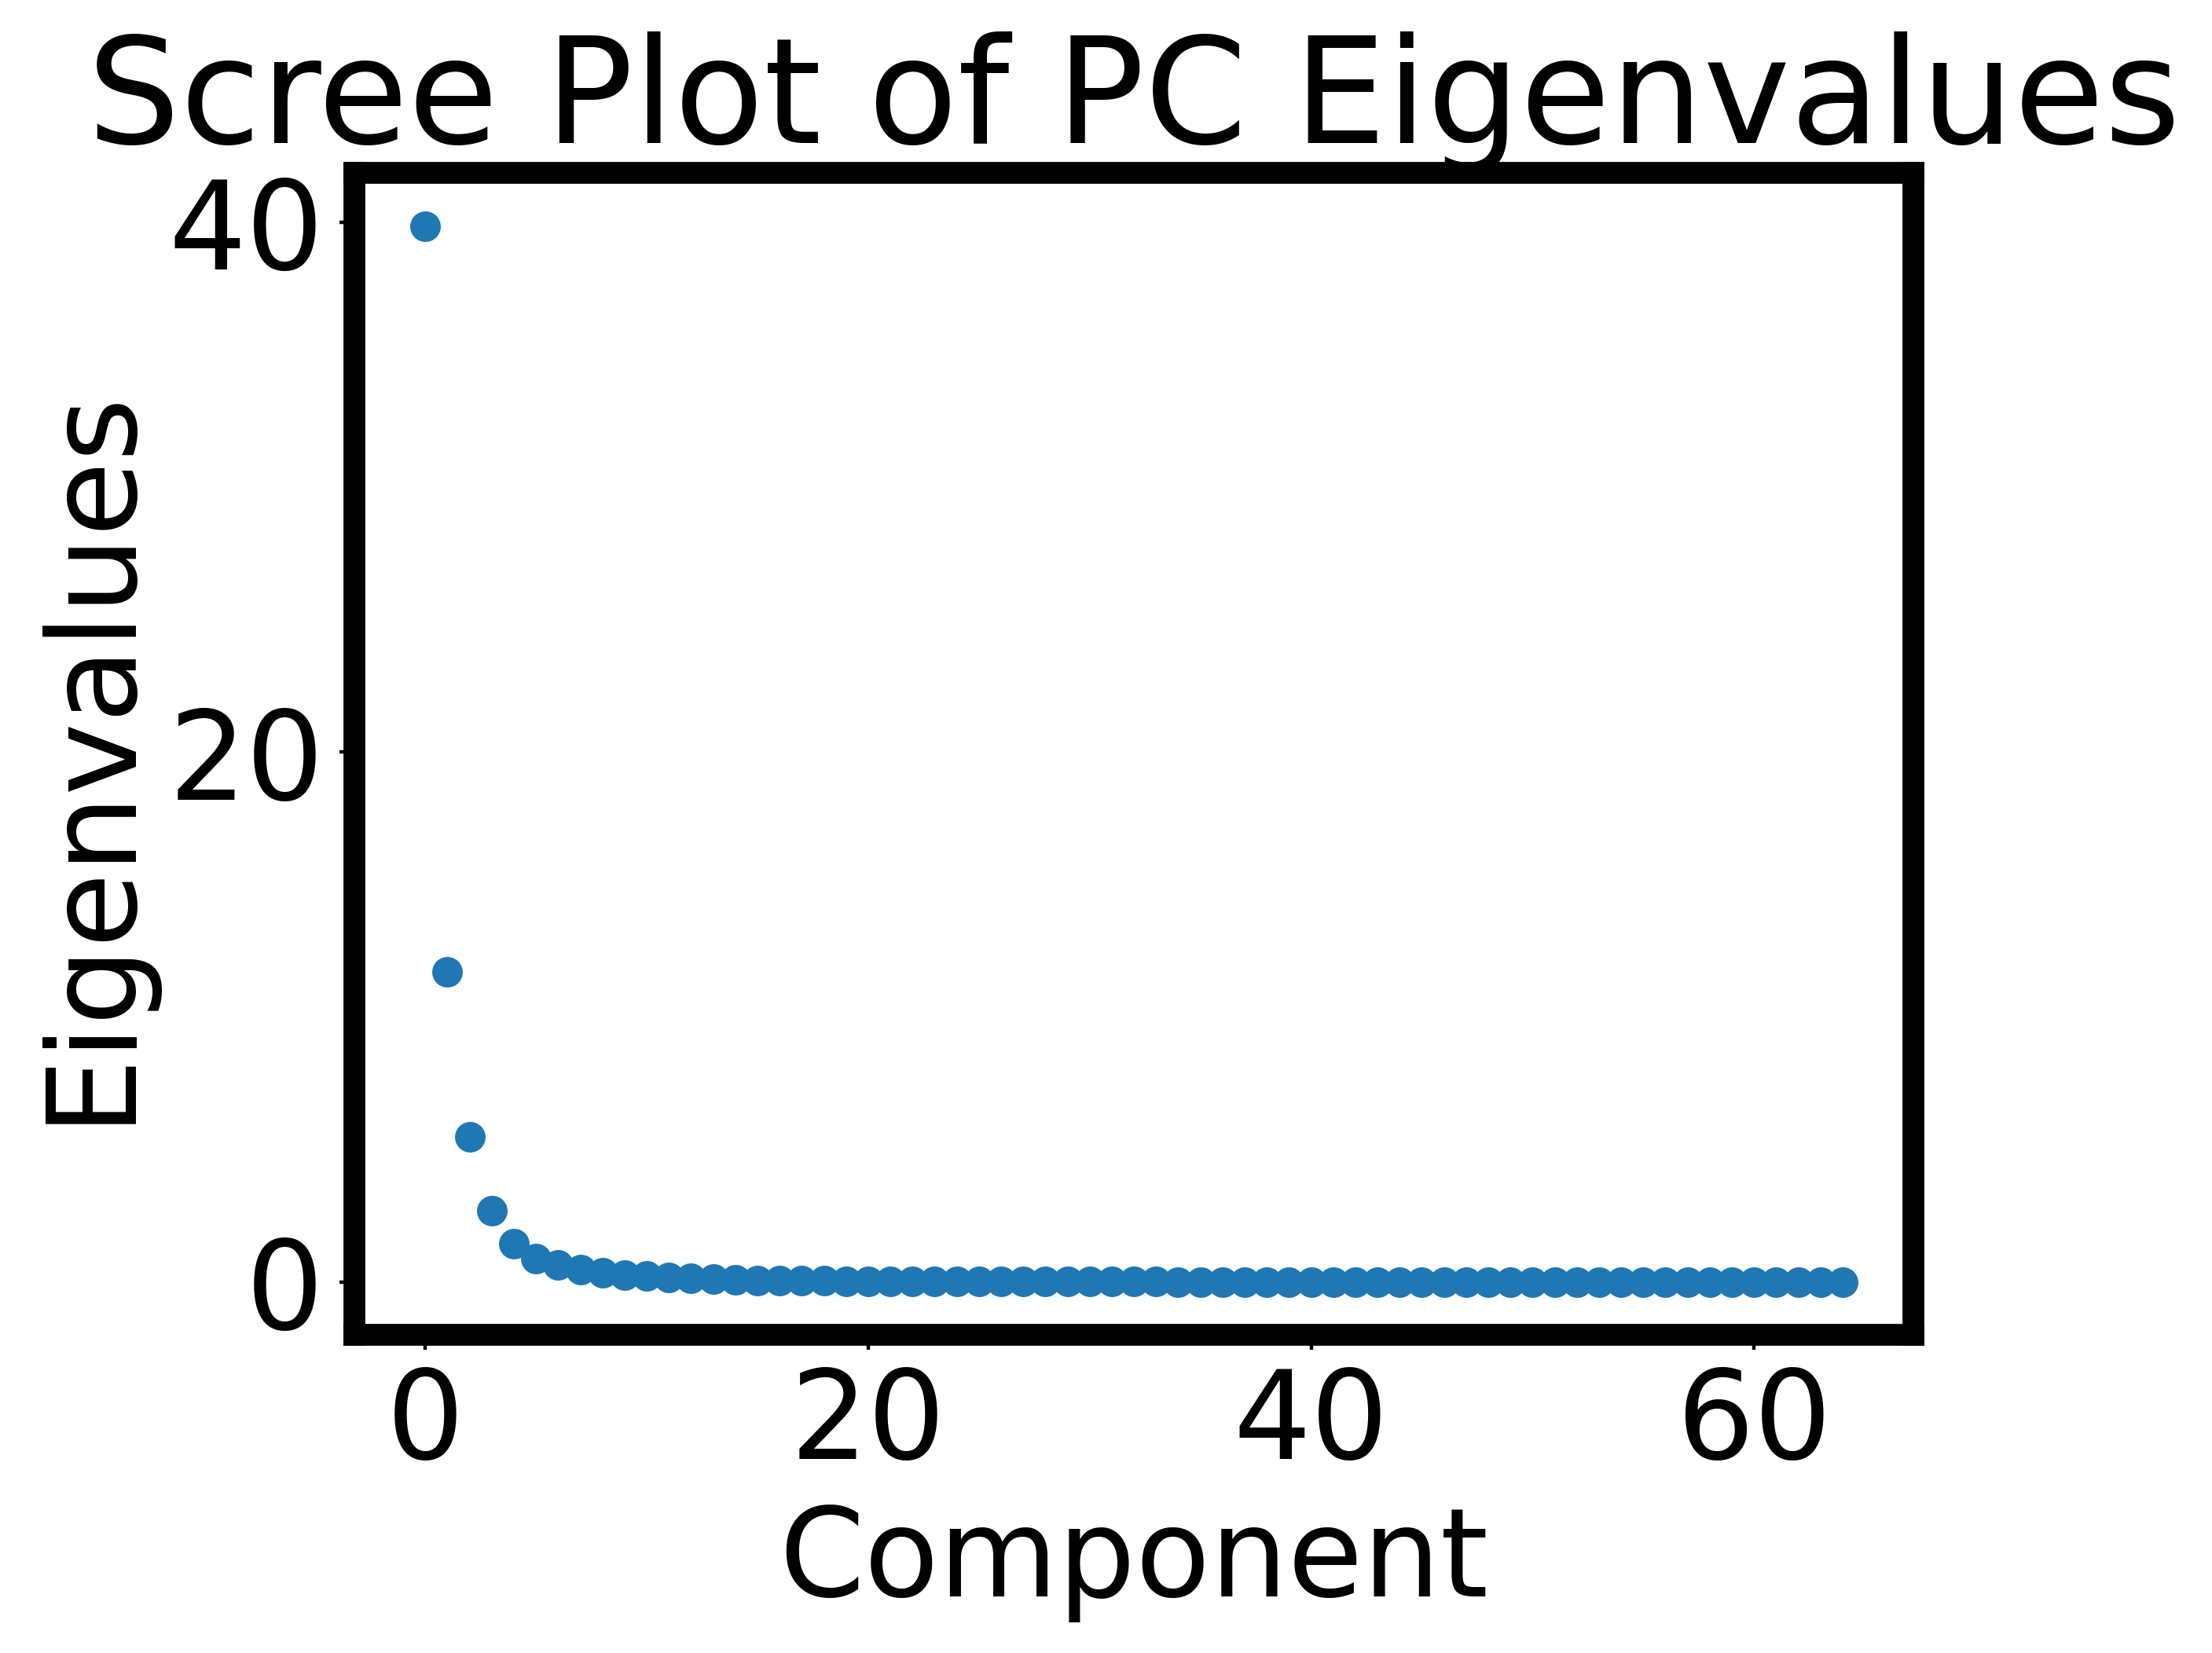

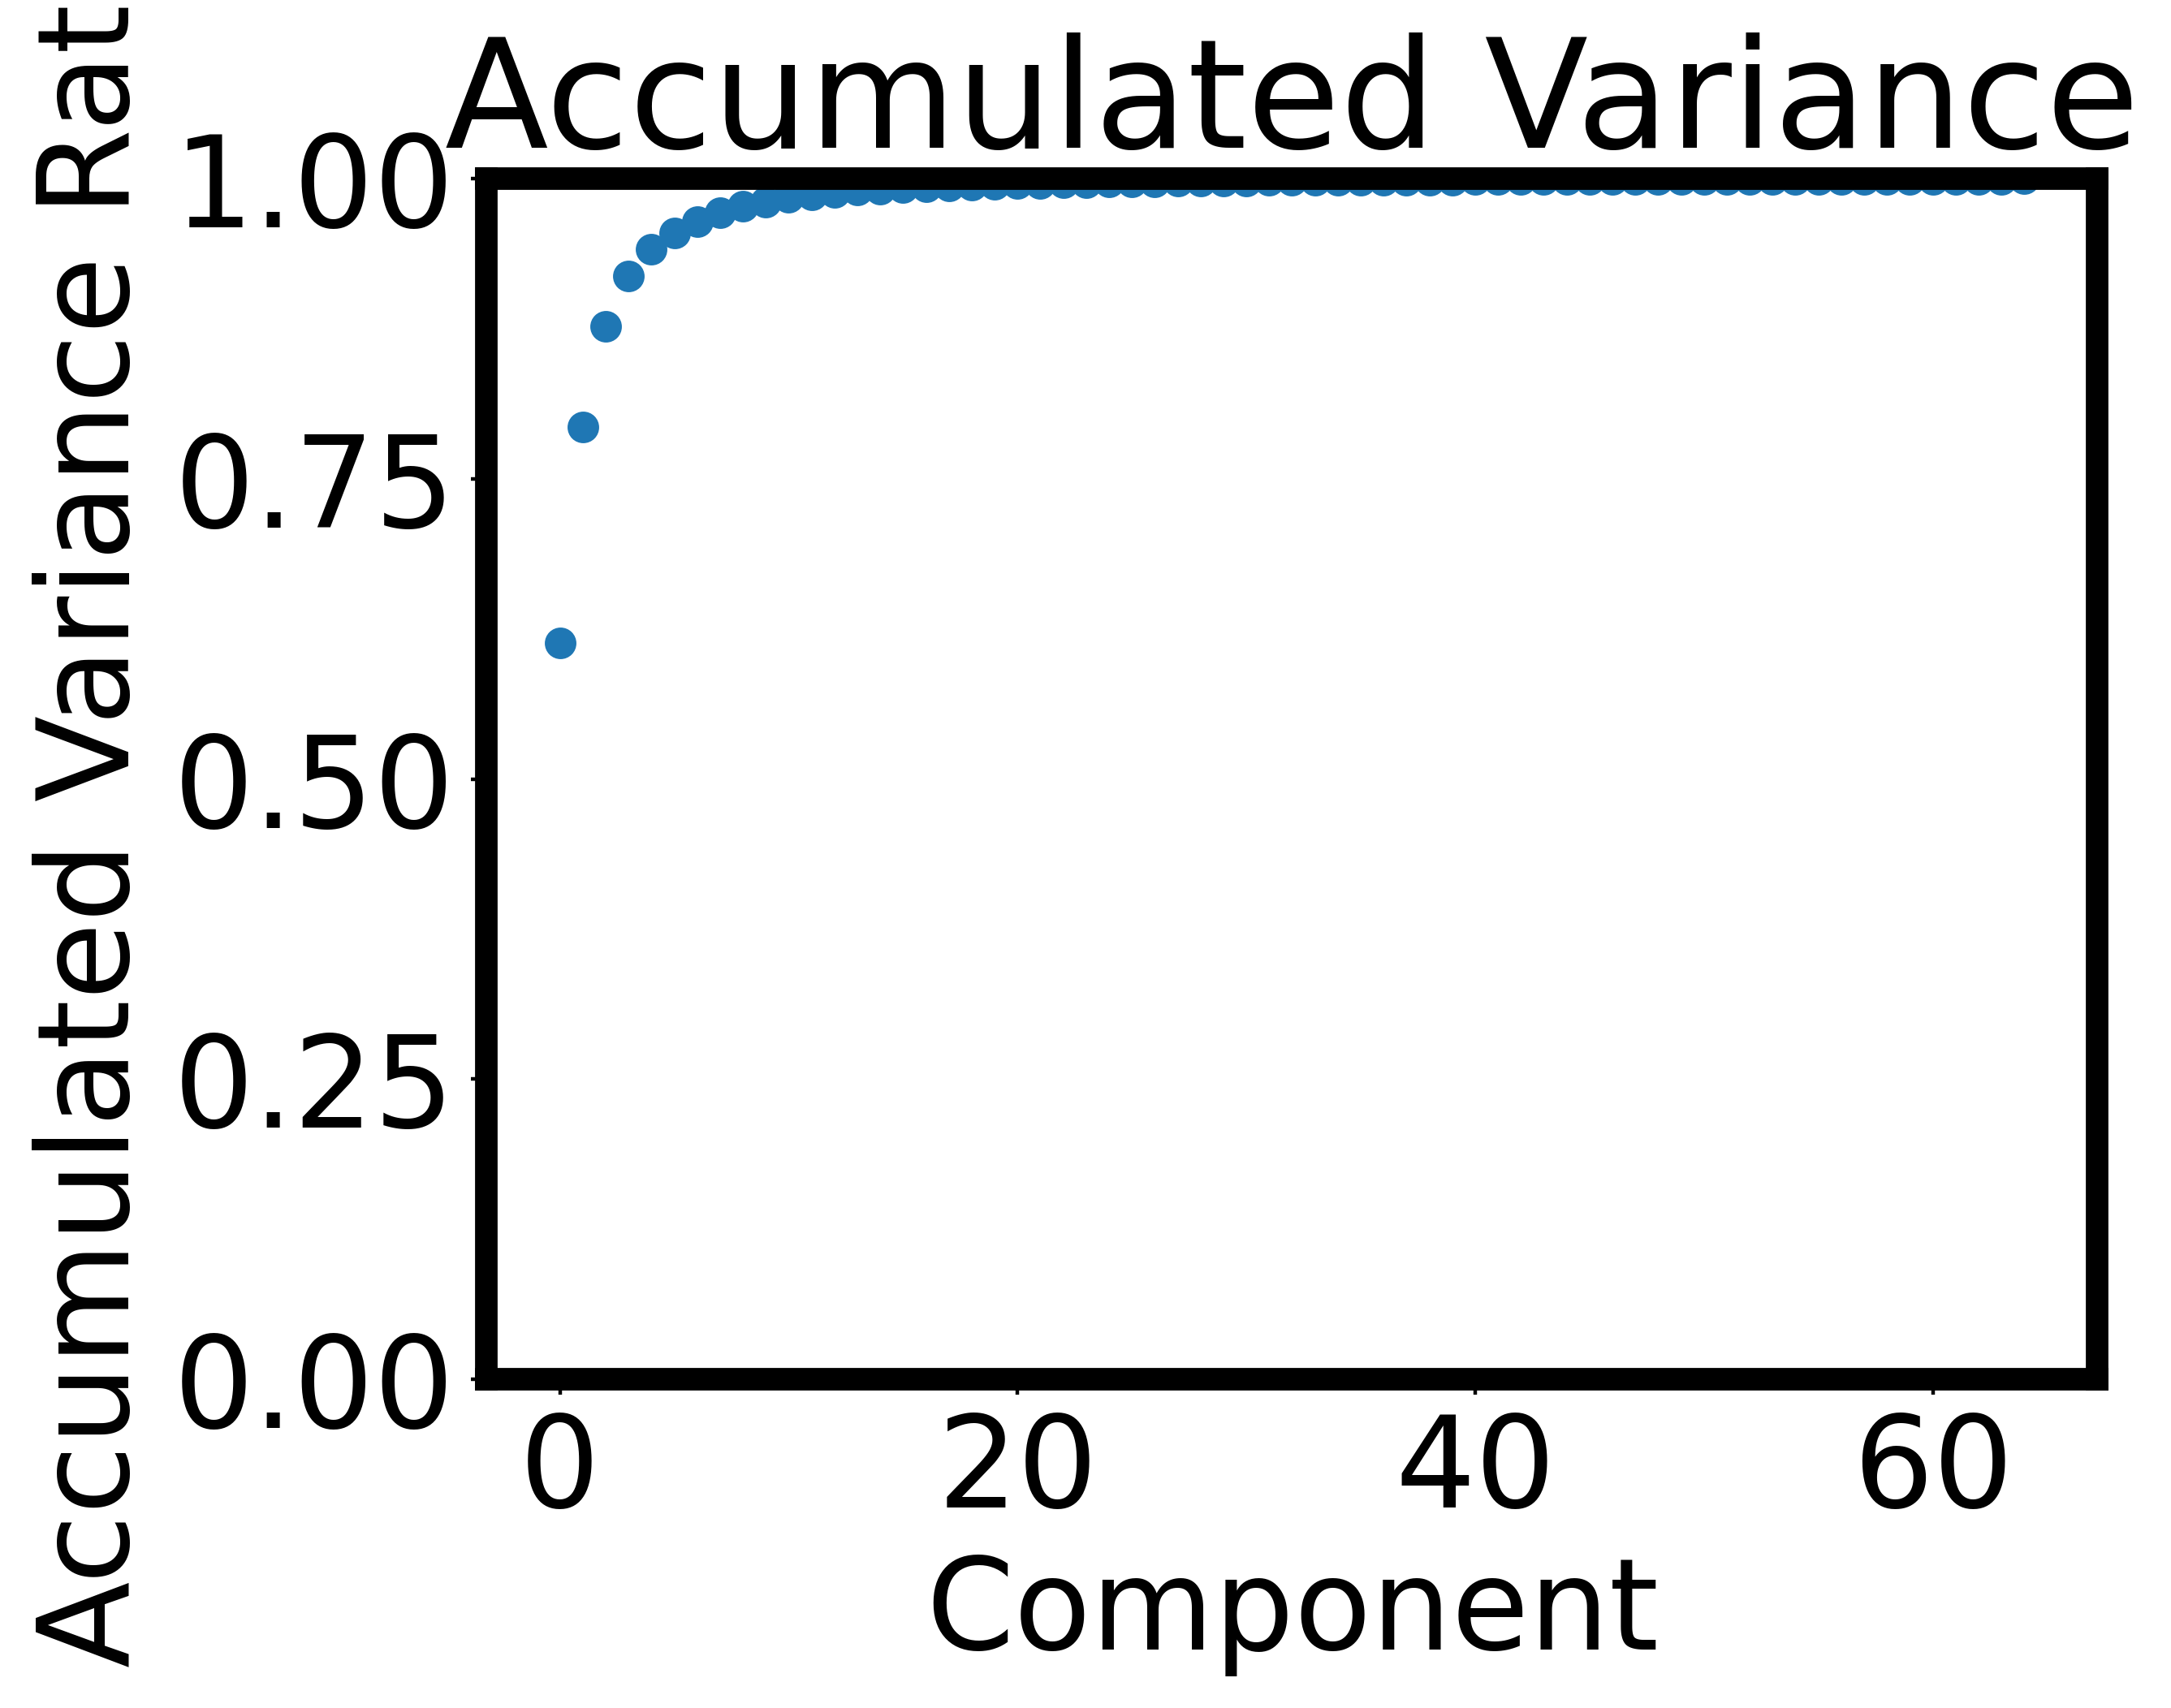

      content_replicate  labels       PC1       PC2
1                 43G_1       0 -2.860927 -2.642993
2              43Gx01_1       0 -2.307620 -1.278223
3                 44G_1       0 -2.778620 -2.344764
4              44Gx01_1       0 -2.303196 -1.091000
5                 45G_1       0 -3.335363 -3.185454
...                 ...     ...       ...       ...
8458  pos_8-20221115_M4       0 -0.529855  3.342936
8459          106Px01_4       0 -0.260150  3.685510
8460          106Px02_4       0 -0.410325  3.313809
8461          108Px01_4       0 -2.668236 -1.500086
8462          108Px02_4       0 -2.750716 -1.629319

[8011 rows x 4 columns]


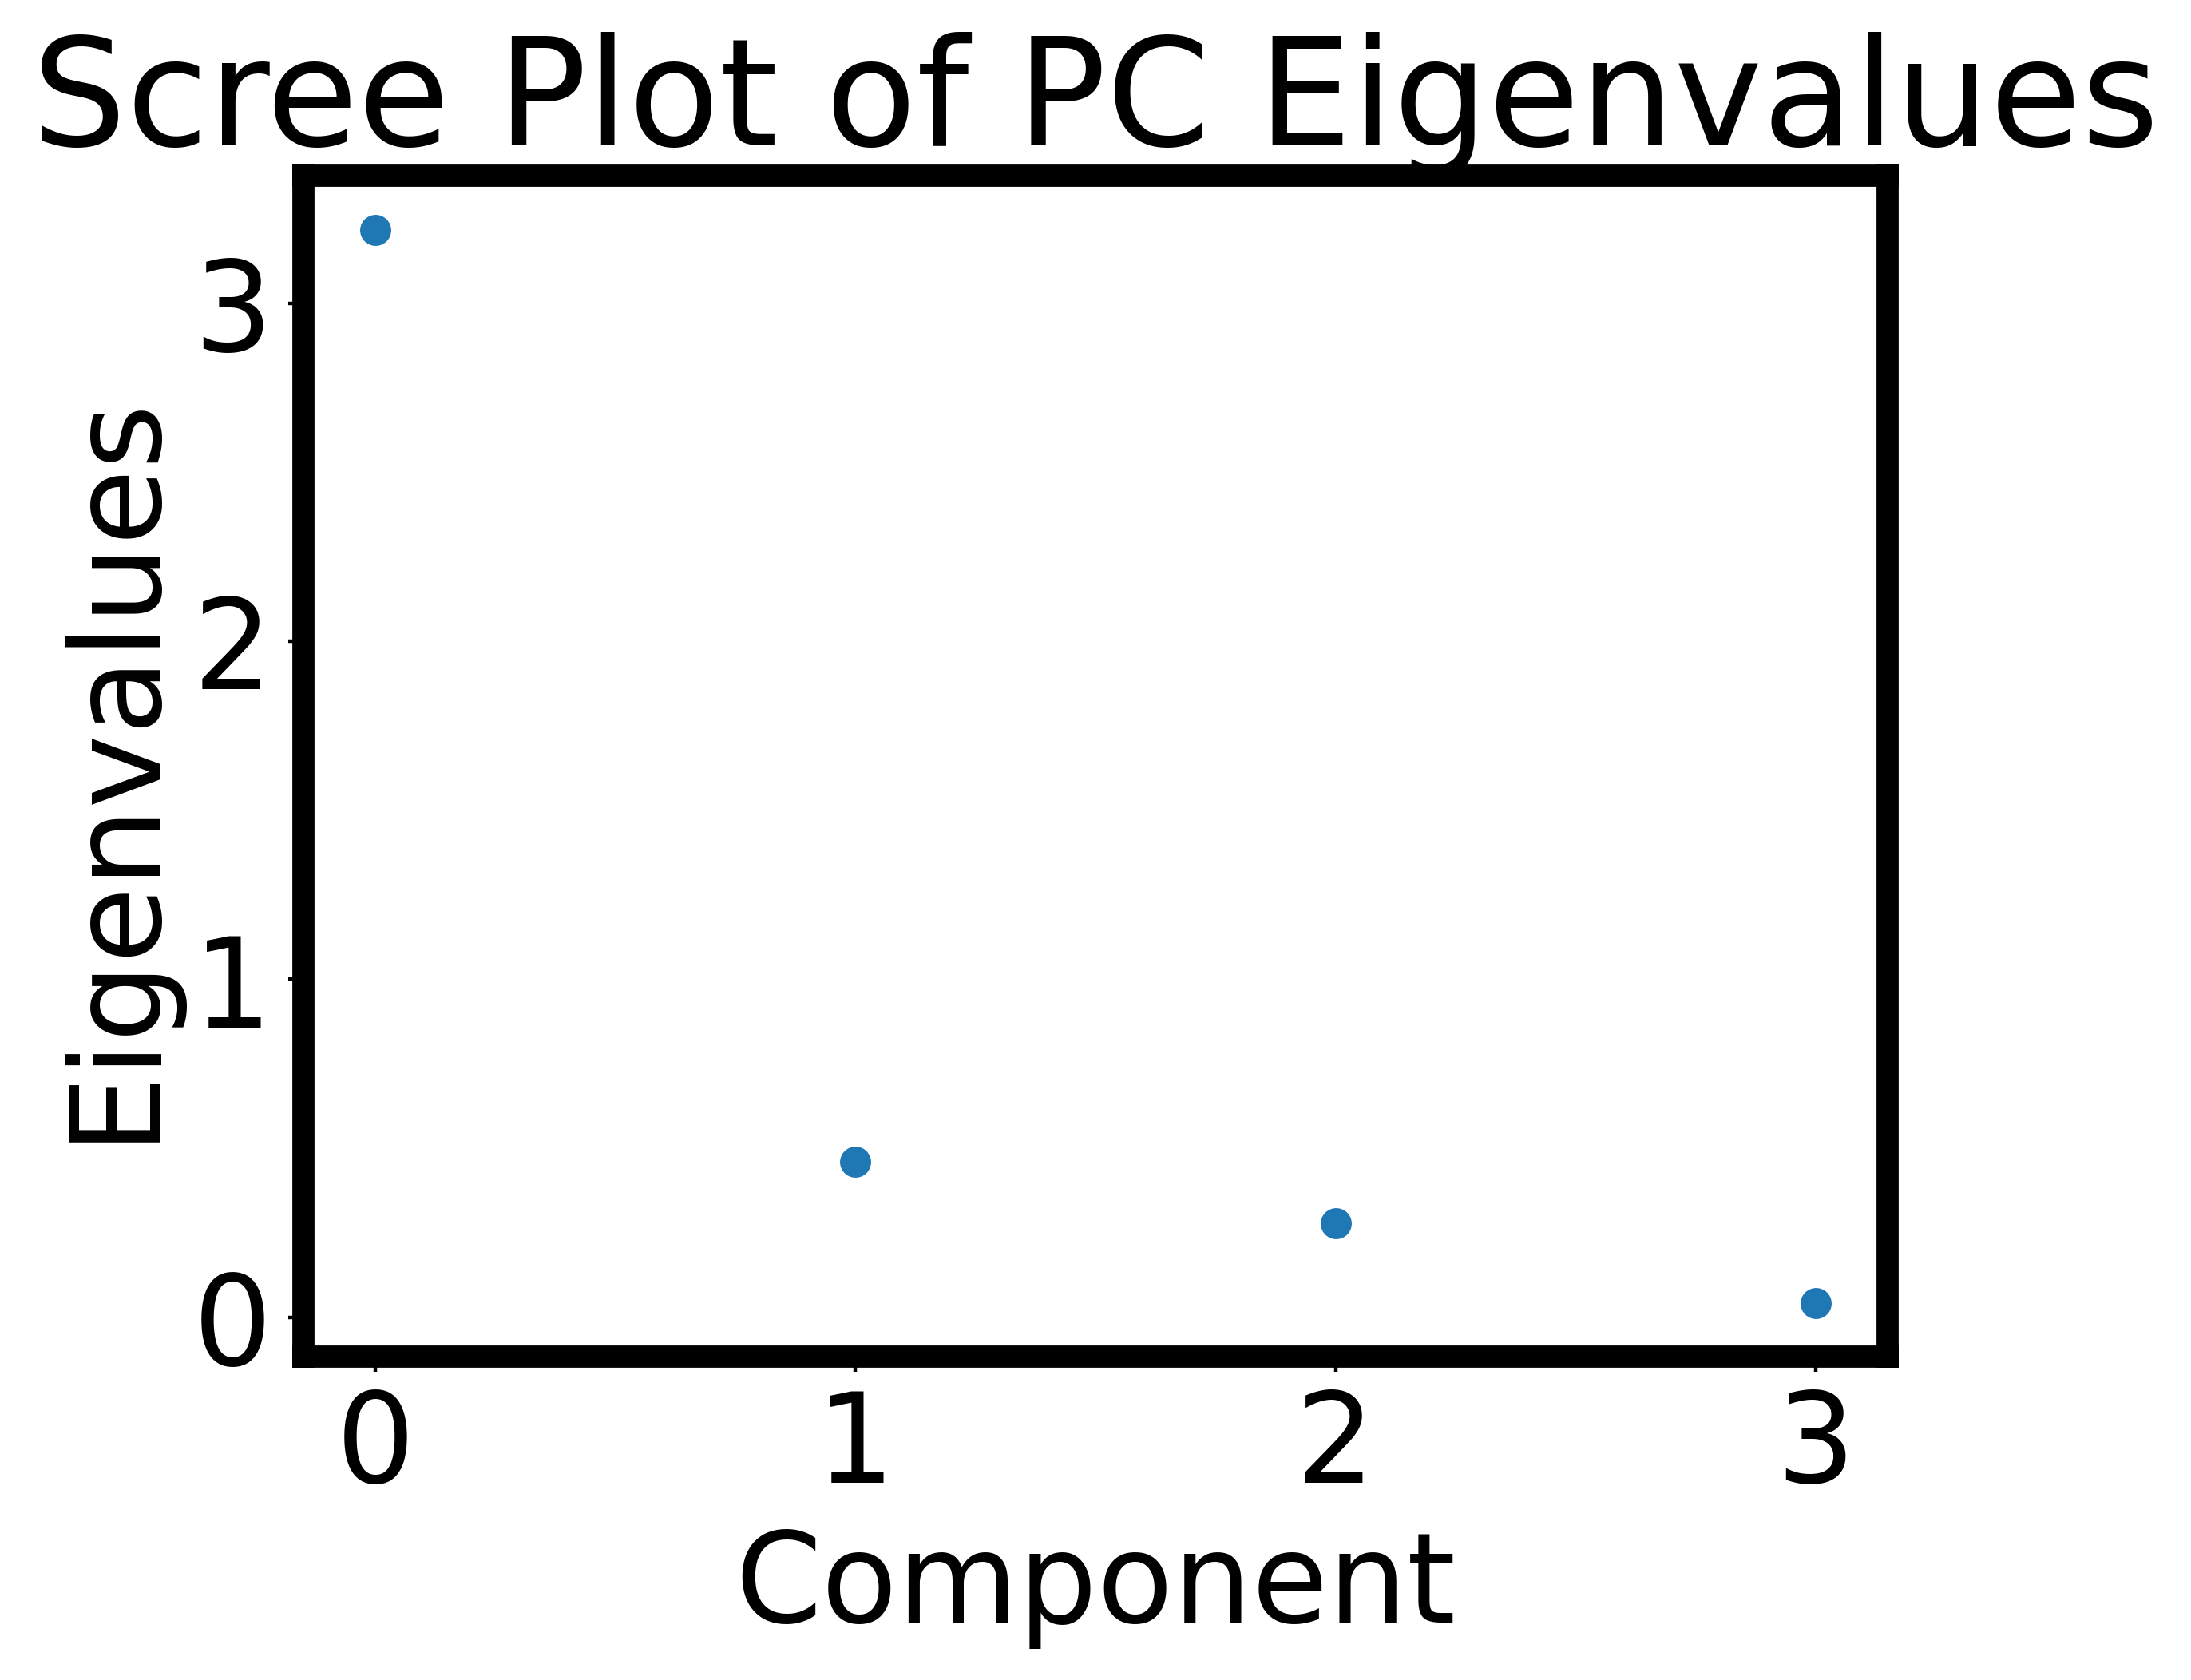

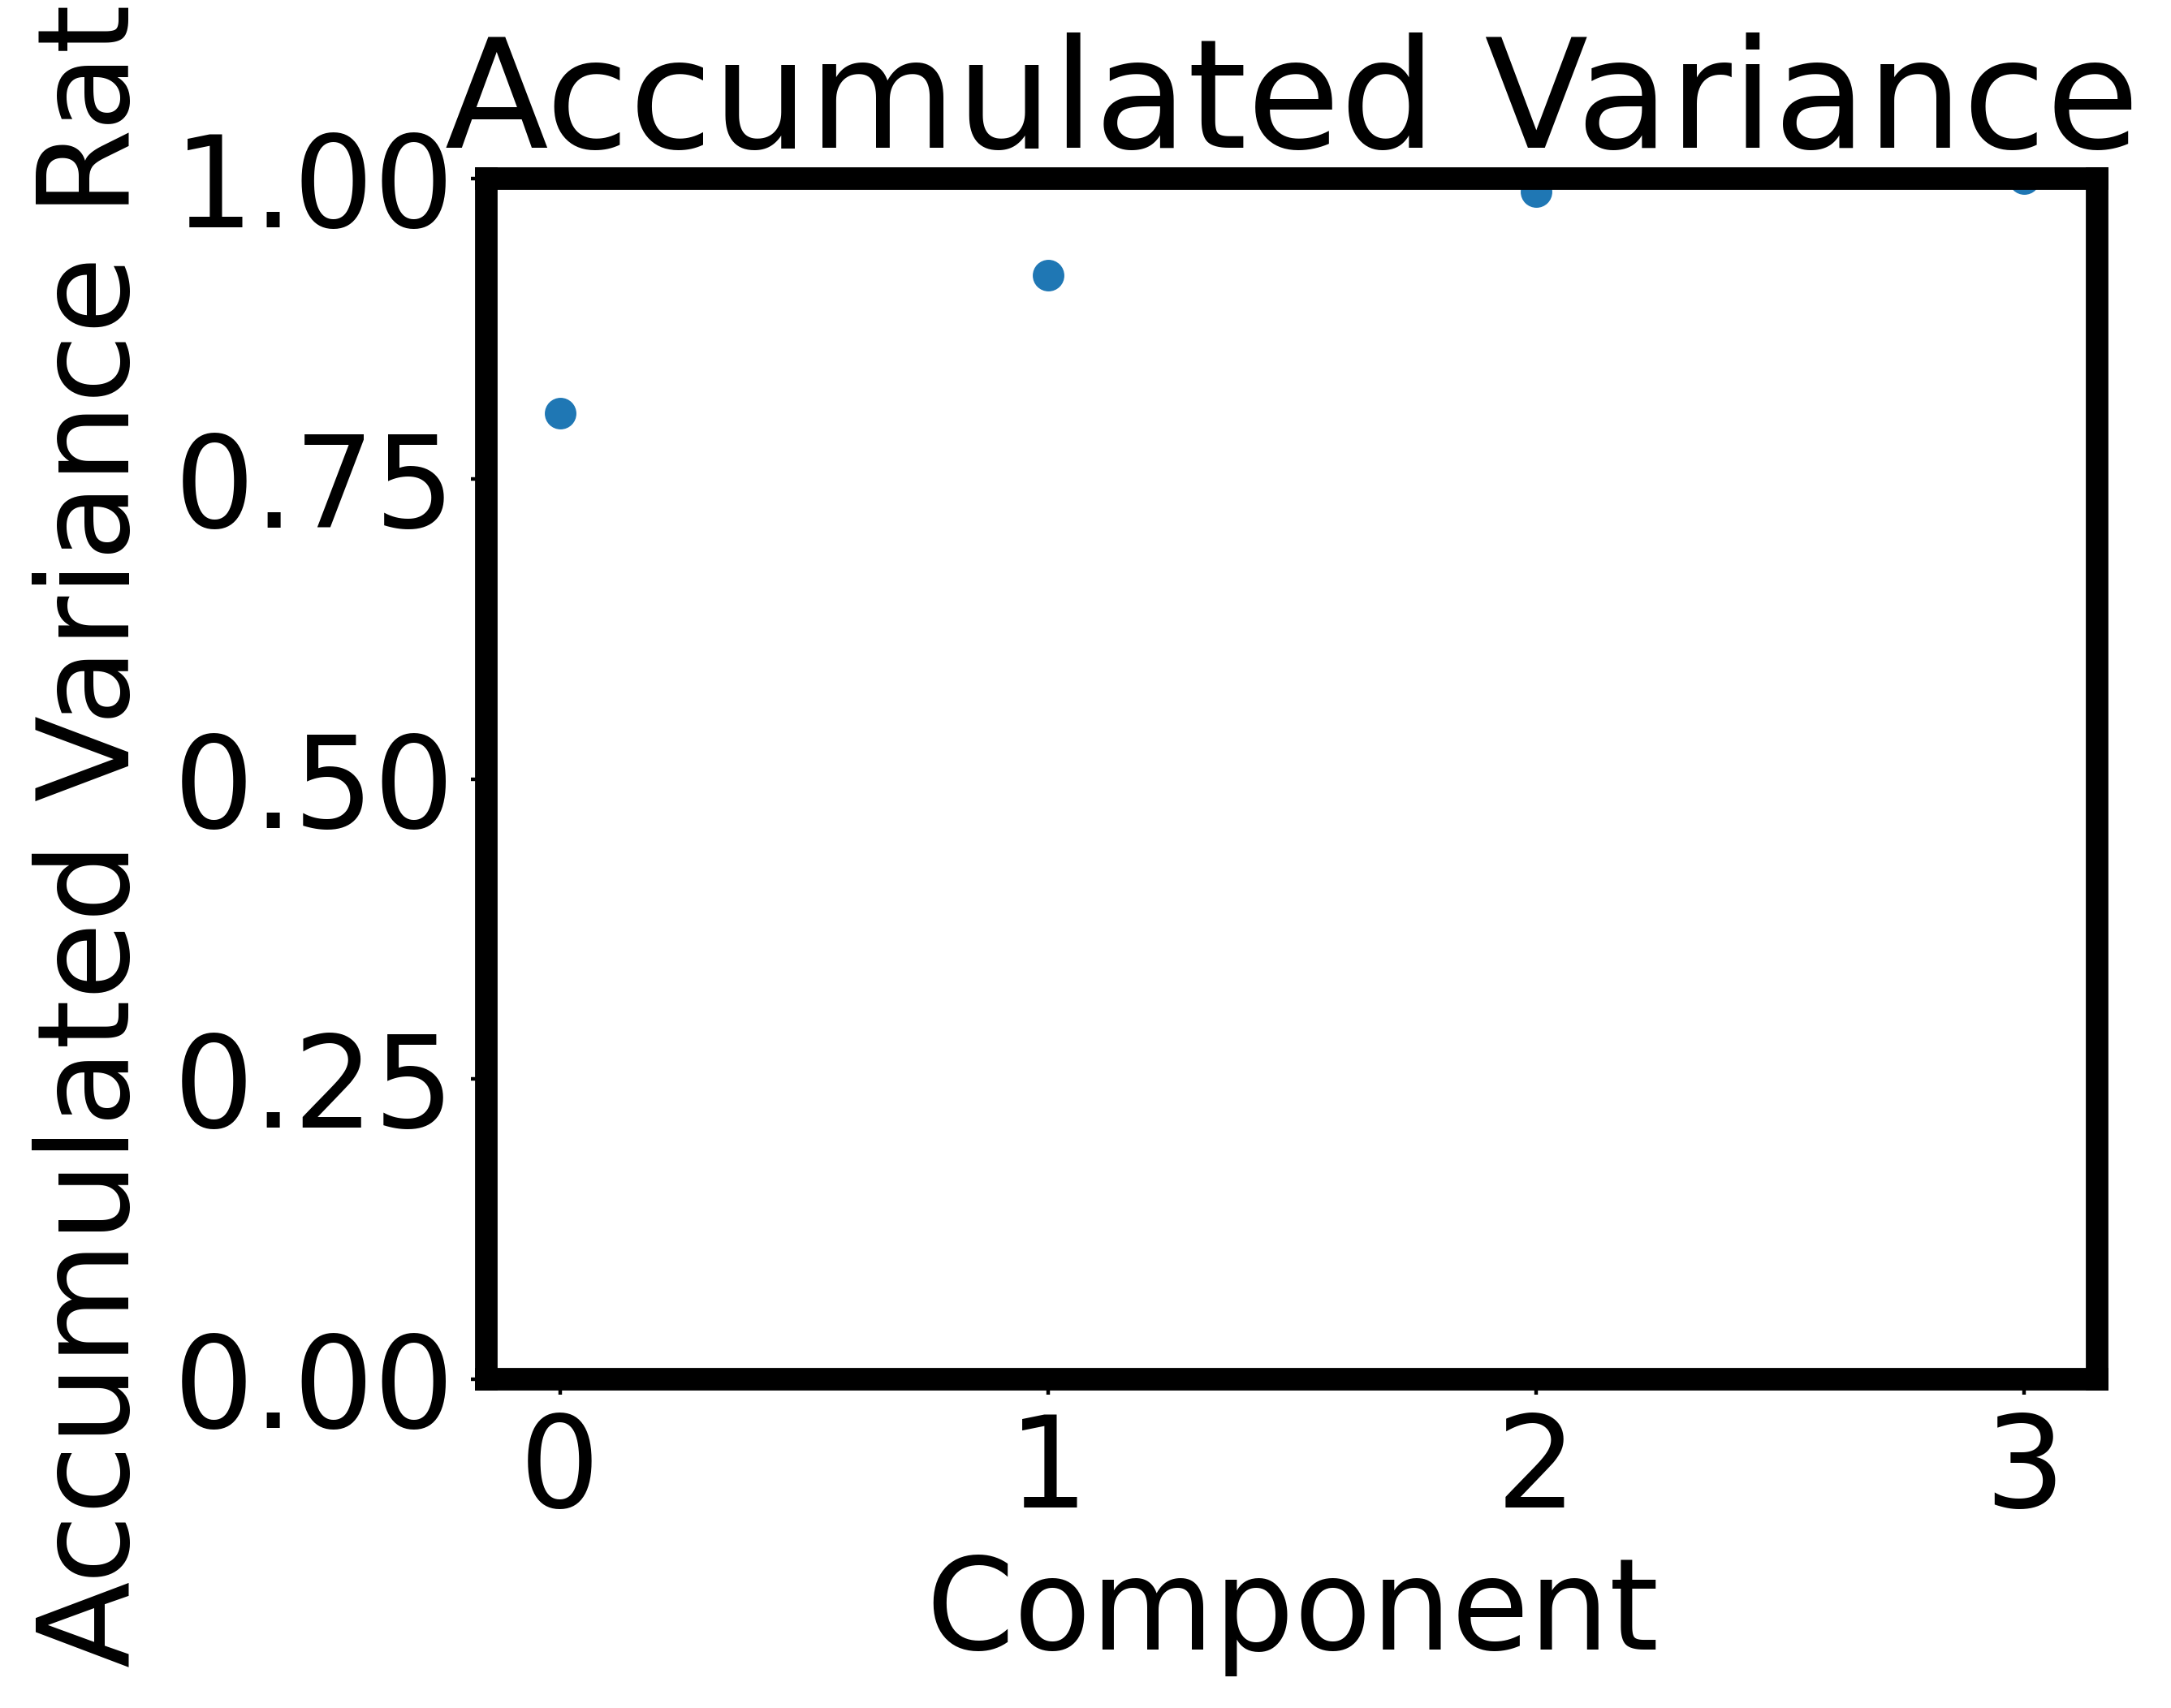

      content_replicate  labels       PC1       PC2
1                 43G_1       0 -0.709869  0.096355
2              43Gx01_1       0 -0.691635  0.107826
3                 44G_1       0 -0.686117  0.113896
4              44Gx01_1       0 -0.698025  0.102628
5                 45G_1       0 -0.703799  0.101383
...                 ...     ...       ...       ...
8458  pos_8-20221115_M4       0 -0.780186  0.044670
8459          106Px01_4       0 -0.770382  0.051190
8460          106Px02_4       0 -0.767813  0.052786
8461          108Px01_4       0 -0.744608  0.067789
8462          108Px02_4       0 -0.786847  0.040040

[8011 rows x 4 columns]


In [ ]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pickle as pkl
import mpl_axes_aligner
import plotly.express as px
import pandas as pd

plt.rcParams['figure.dpi'] = 400

x = StandardScaler().fit_transform(ml_quic.get_numpy_dataset('raw'))
x_m = StandardScaler().fit_transform(ml_quic.get_numpy_dataset('analysis'))
y = ml_quic.get_numpy_dataset('labels')

pca = PCA().fit(x)
pca_m = PCA().fit(x_m)
skb = SelectKBest(k = 'all').fit(x, y)

pc_feature_scores = abs(pca.components_)
features = []
for i in range(len(pc_feature_scores[0])):
    features.append(np.sum(pc_feature_scores[5, i]))

plt.scatter(np.arange(len(features)), features)
plt.show()

## RAW DATA
# Scree Plot 
plt.scatter(np.arange(len(features)), pca.explained_variance_)
plt.title('Scree Plot of PC Eigenvalues')
plt.ylabel('Eigenvalues')
plt.xlabel('Component')
plt.show()

# Variance Ratio
sum = 0
accumulated_variance = []
for val in pca.explained_variance_ratio_:
    sum += val
    accumulated_variance.append(sum)

# Plot accumlation of variance
plt.scatter(np.arange(len(features)), np.array(accumulated_variance))
plt.title('Accumulated Variance')
plt.ylabel('Accumulated Variance Ratio')
plt.ylim([0, 1])
plt.xlabel('Component')
plt.show()

# Get Dataframe Version
df = ml_quic.raw_dataset

# Identify Samples
x_pca = pca.transform(x)

new_df = pd.DataFrame()
new_df['content_replicate'] = df['content_replicate']
df = new_df
df.insert(1, 'labels', y, True)

for i in range(1, 3):
    df.insert(i + 1, 'PC{}'.format(i), x_pca[:, i-1], True)
    
print(df)

fig = px.scatter(df, x='PC1', y='PC2', color = 'labels', hover_data=['content_replicate'])
fig.show()

## METRICS DATA
# Scree Plot 
plt.scatter(np.arange(len(pca_m.explained_variance_)), pca_m.explained_variance_)
plt.title('Scree Plot of PC Eigenvalues')
plt.ylabel('Eigenvalues')
plt.xlabel('Component')
plt.show()

# Variance Ratio
sum = 0
accumulated_variance = []
for val in pca_m.explained_variance_ratio_:
    sum += val
    accumulated_variance.append(sum)

# Plot accumlation of variance
plt.scatter(np.arange(len(pca_m.explained_variance_)), np.array(accumulated_variance))
plt.title('Accumulated Variance')
plt.ylabel('Accumulated Variance Ratio')
plt.ylim([0, 1])
plt.xlabel('Component')
plt.show()

# Create Biplot
# Get Dataframe Version
df = ml_quic.analysis_dataset

# Identify Samples
x_pca = pca_m.transform(x_m)

new_df = pd.DataFrame()
new_df['content_replicate'] = df['content_replicate']
df = new_df
df.insert(1, 'labels', y, True)

for i in range(1, 3):
    df.insert(i + 1, 'PC{}'.format(i), x_pca[:, i-1], True)
    
print(df)

fig = px.scatter(df, x='PC1', y='PC2', color = 'labels', hover_data=['content_replicate'])
fig.show()

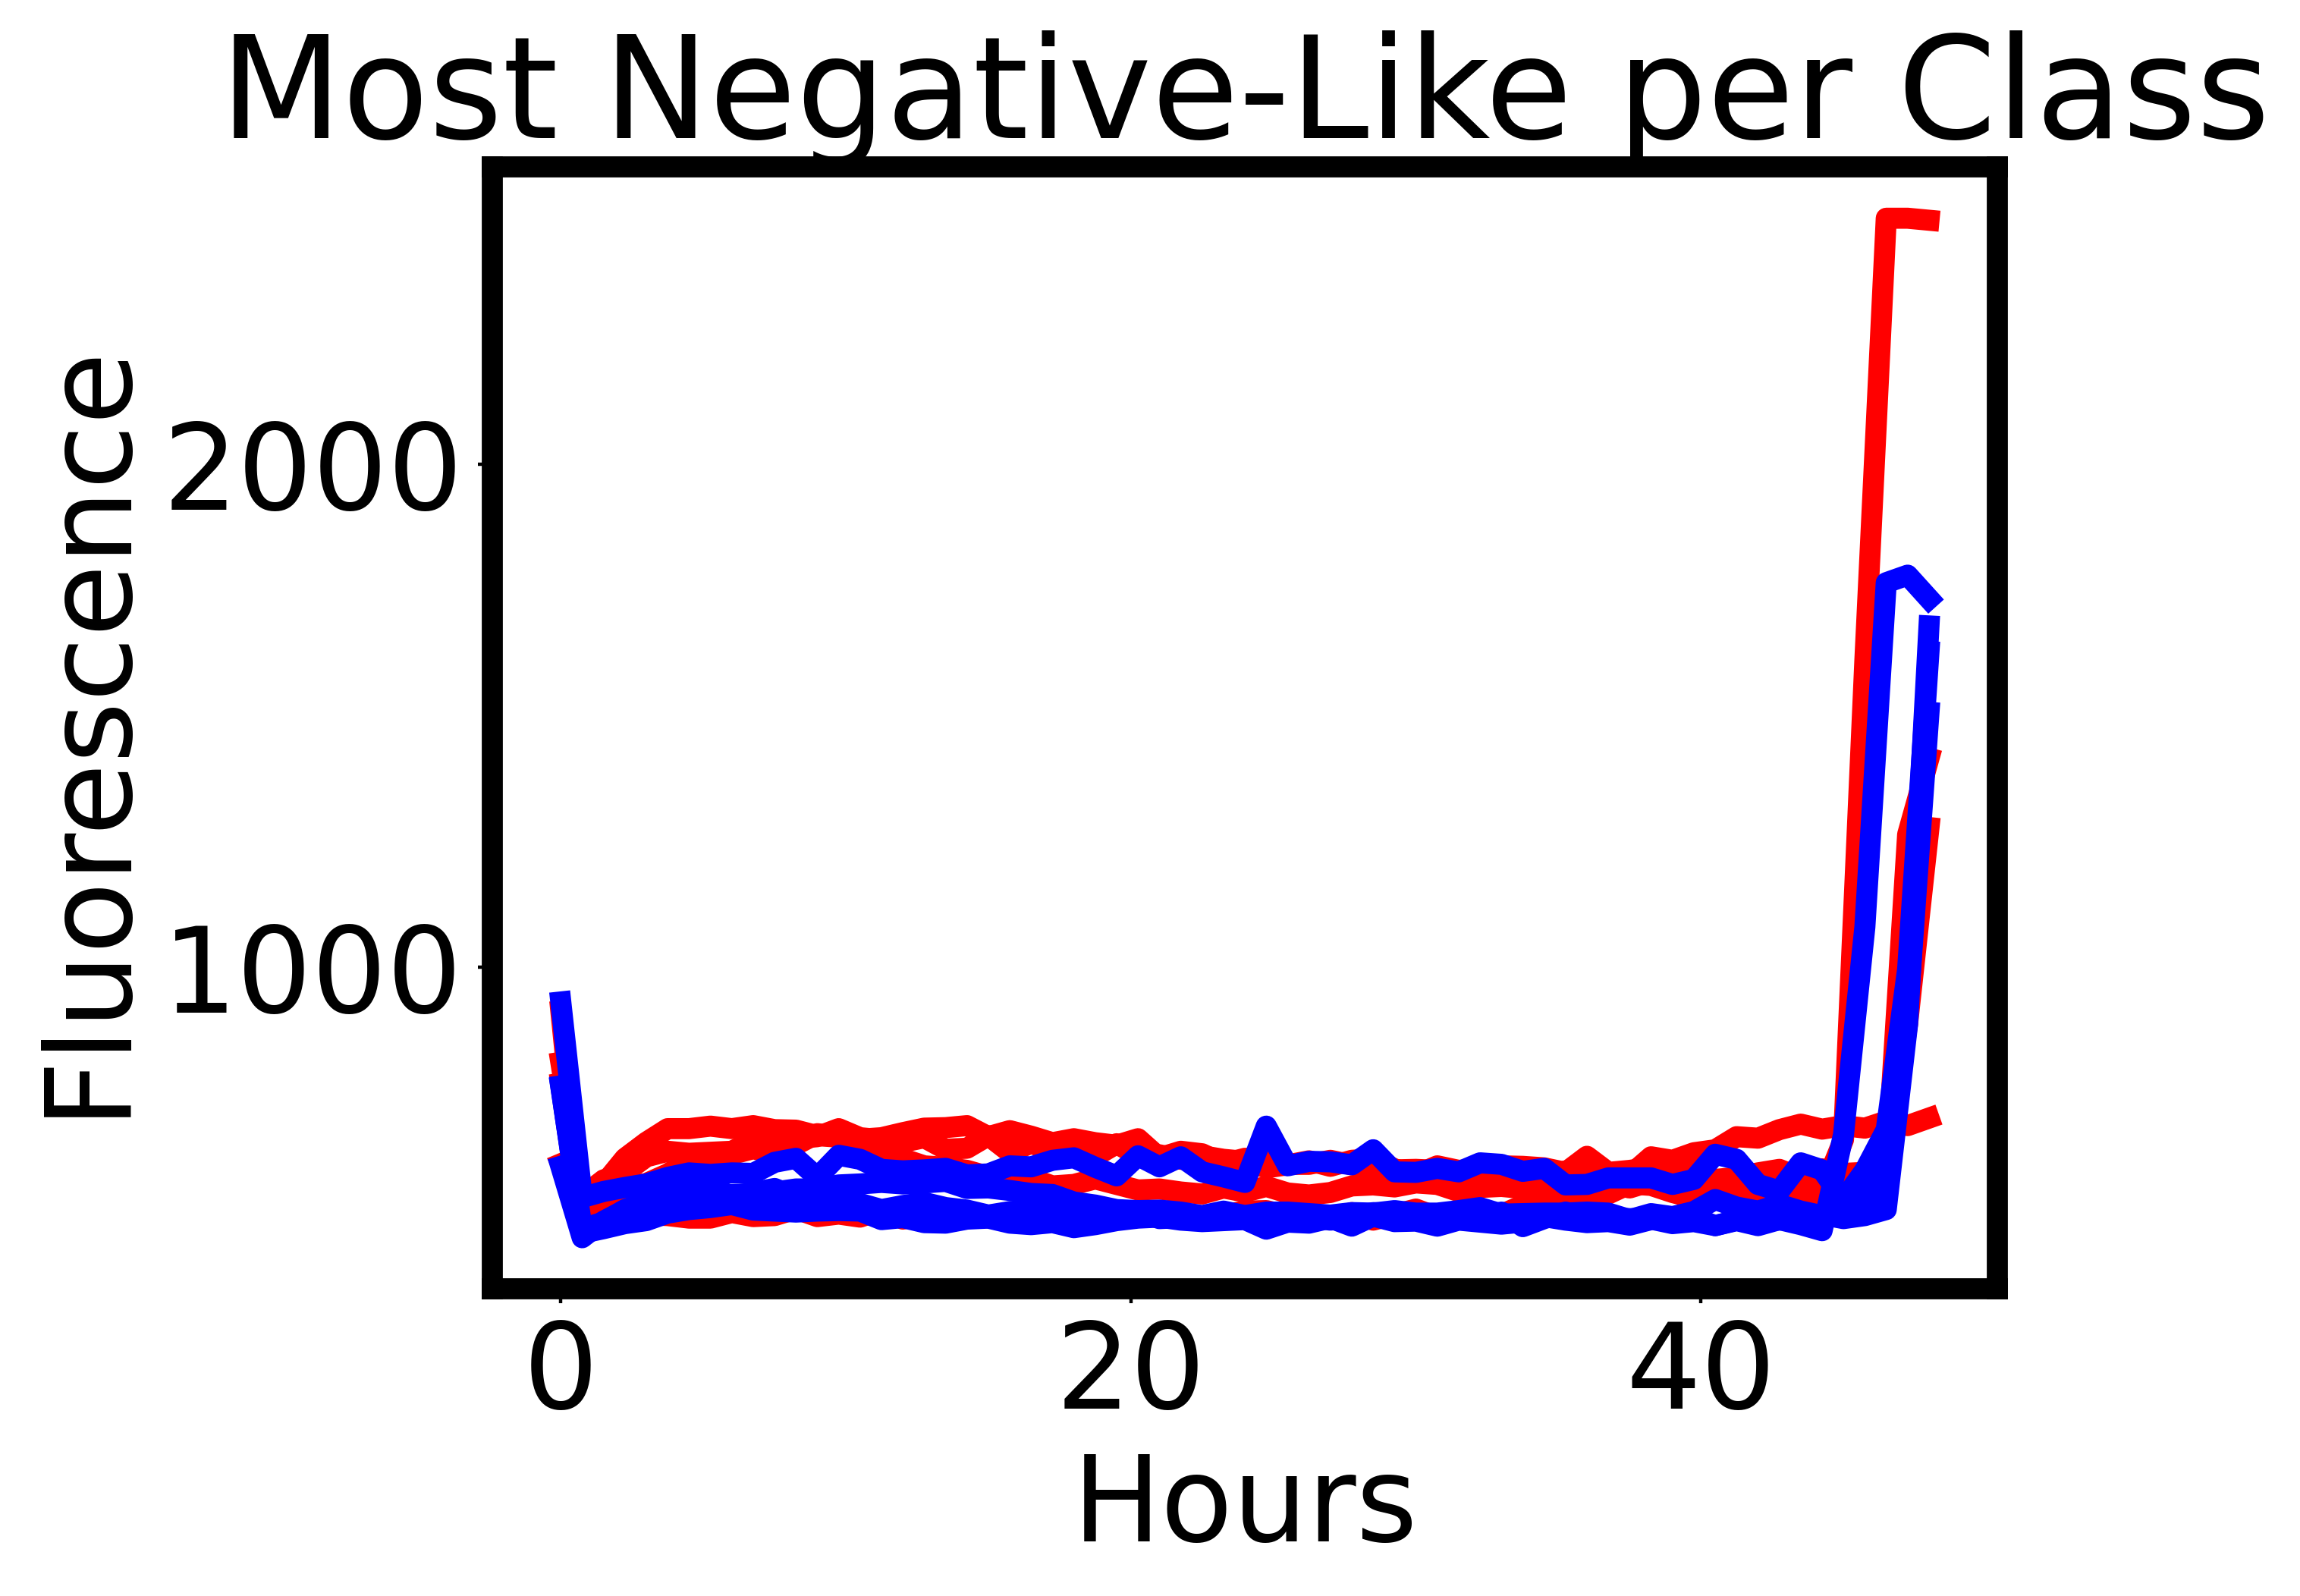

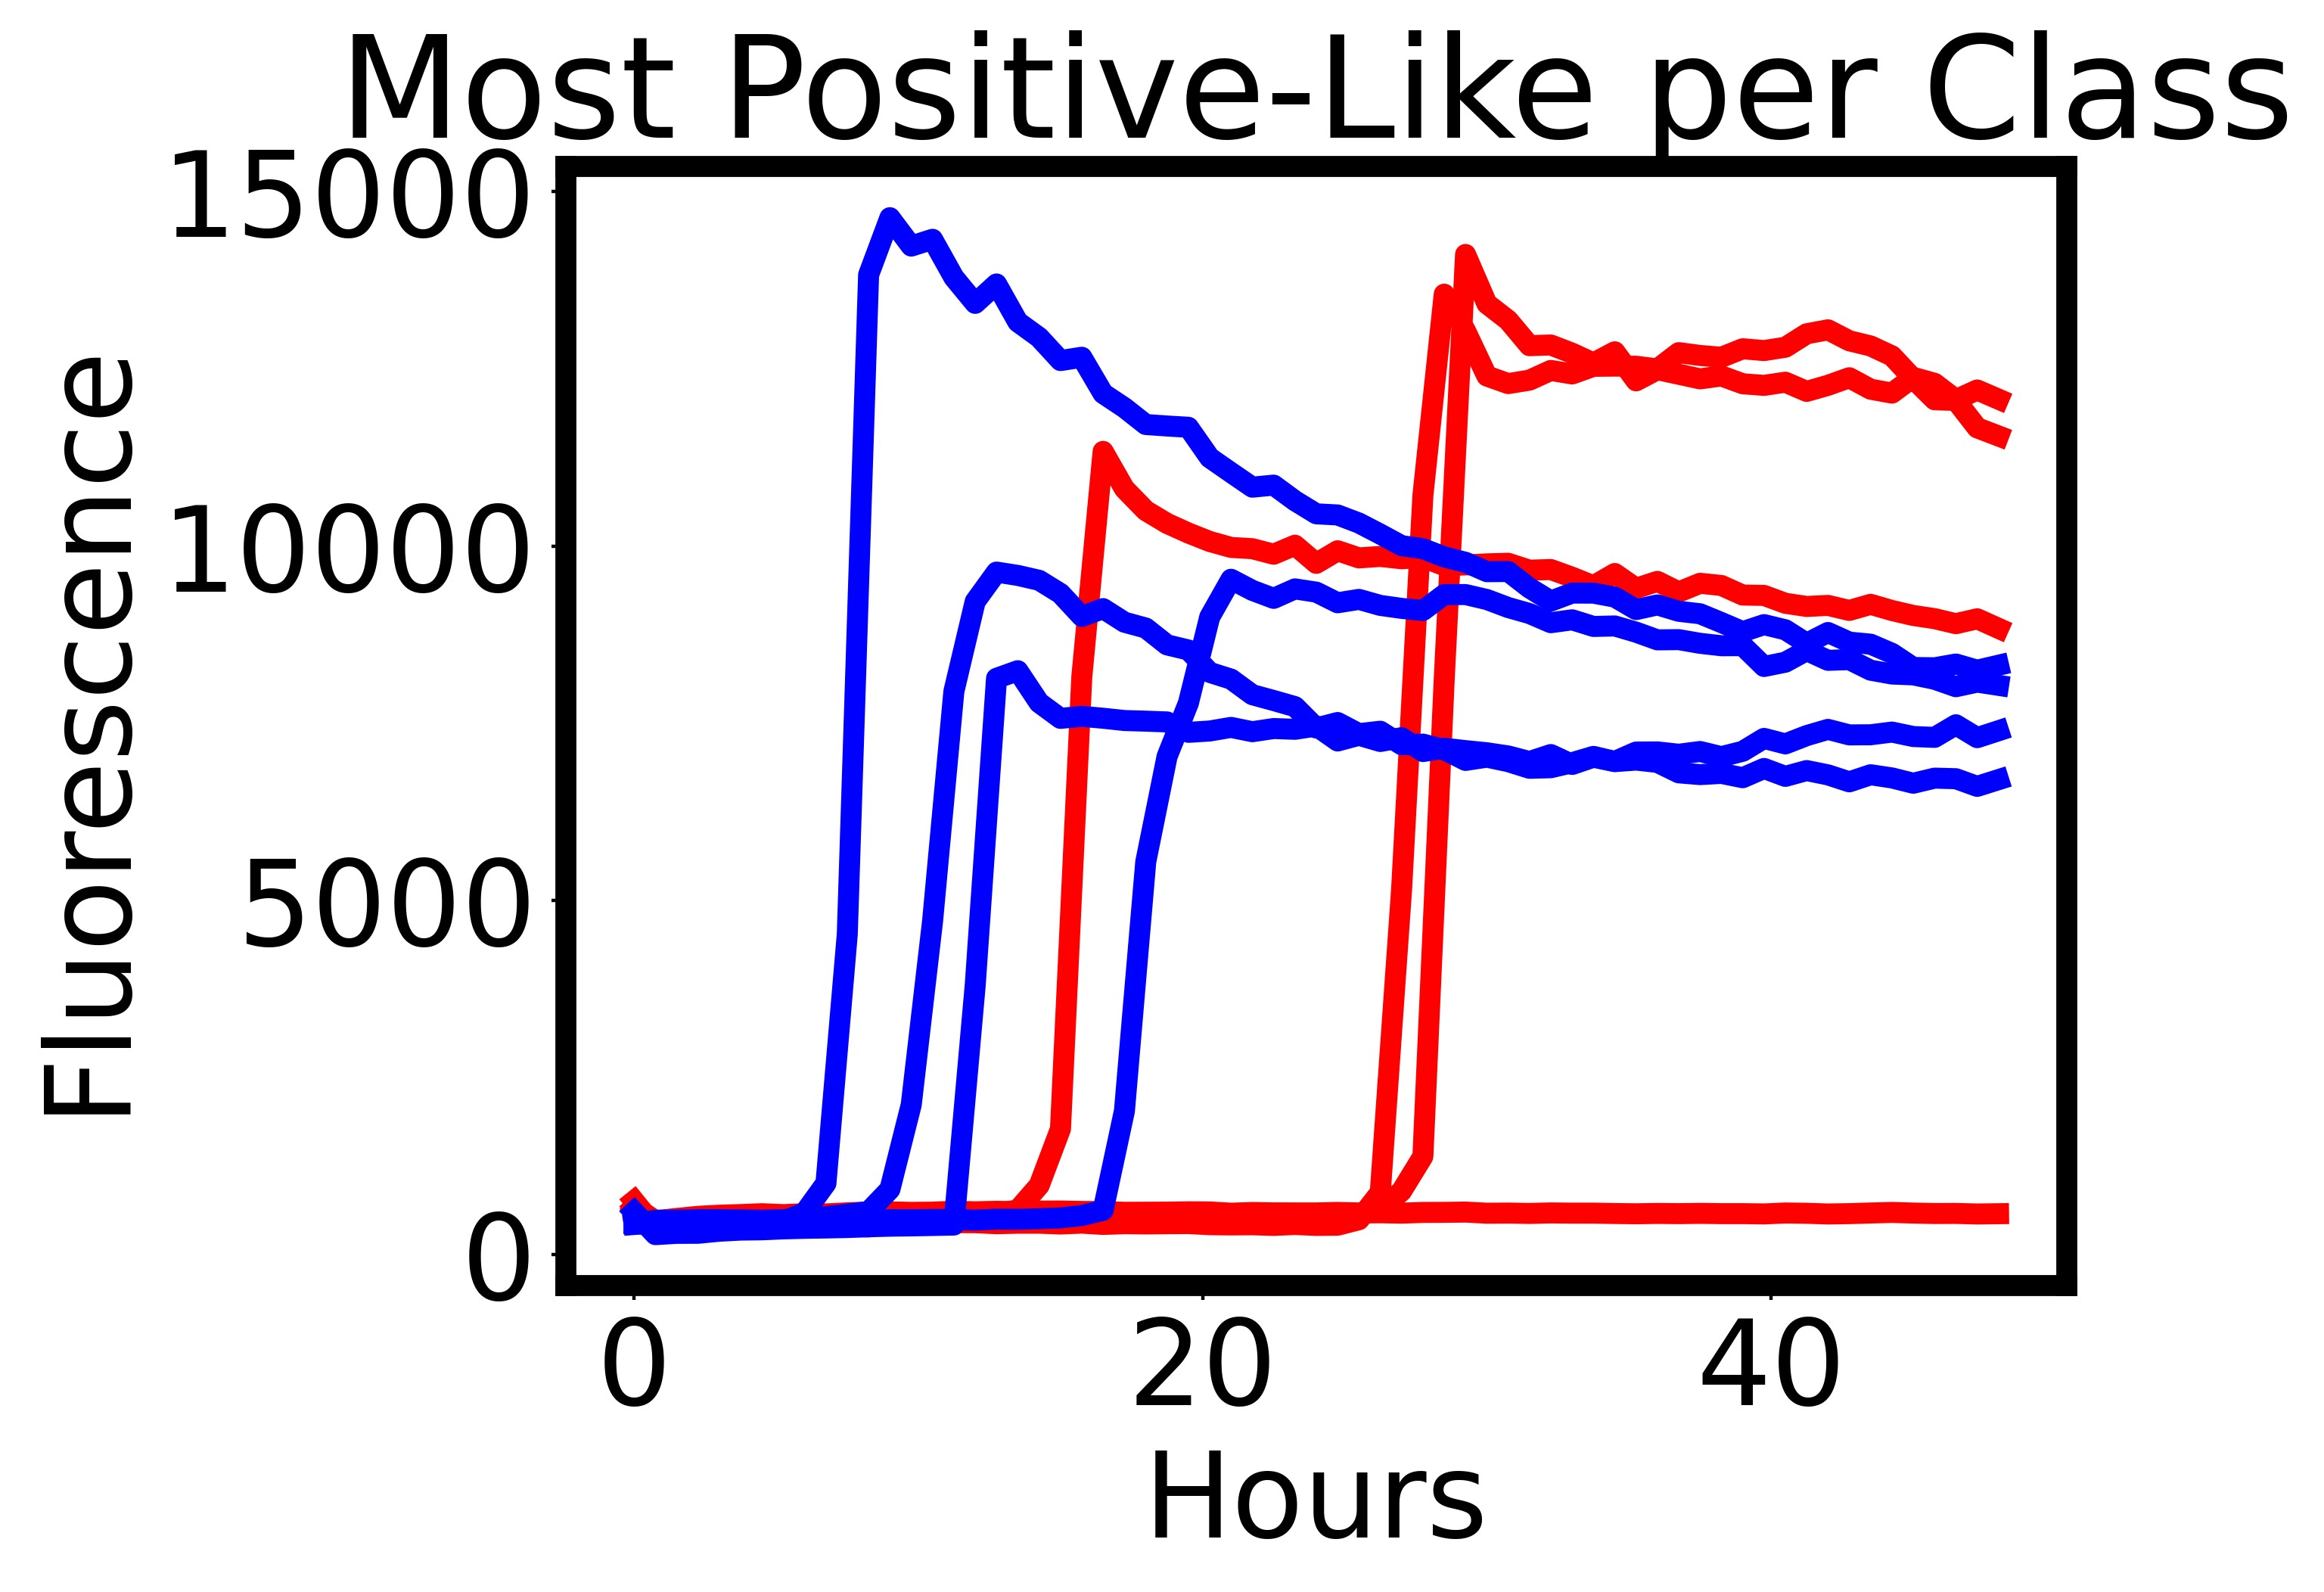

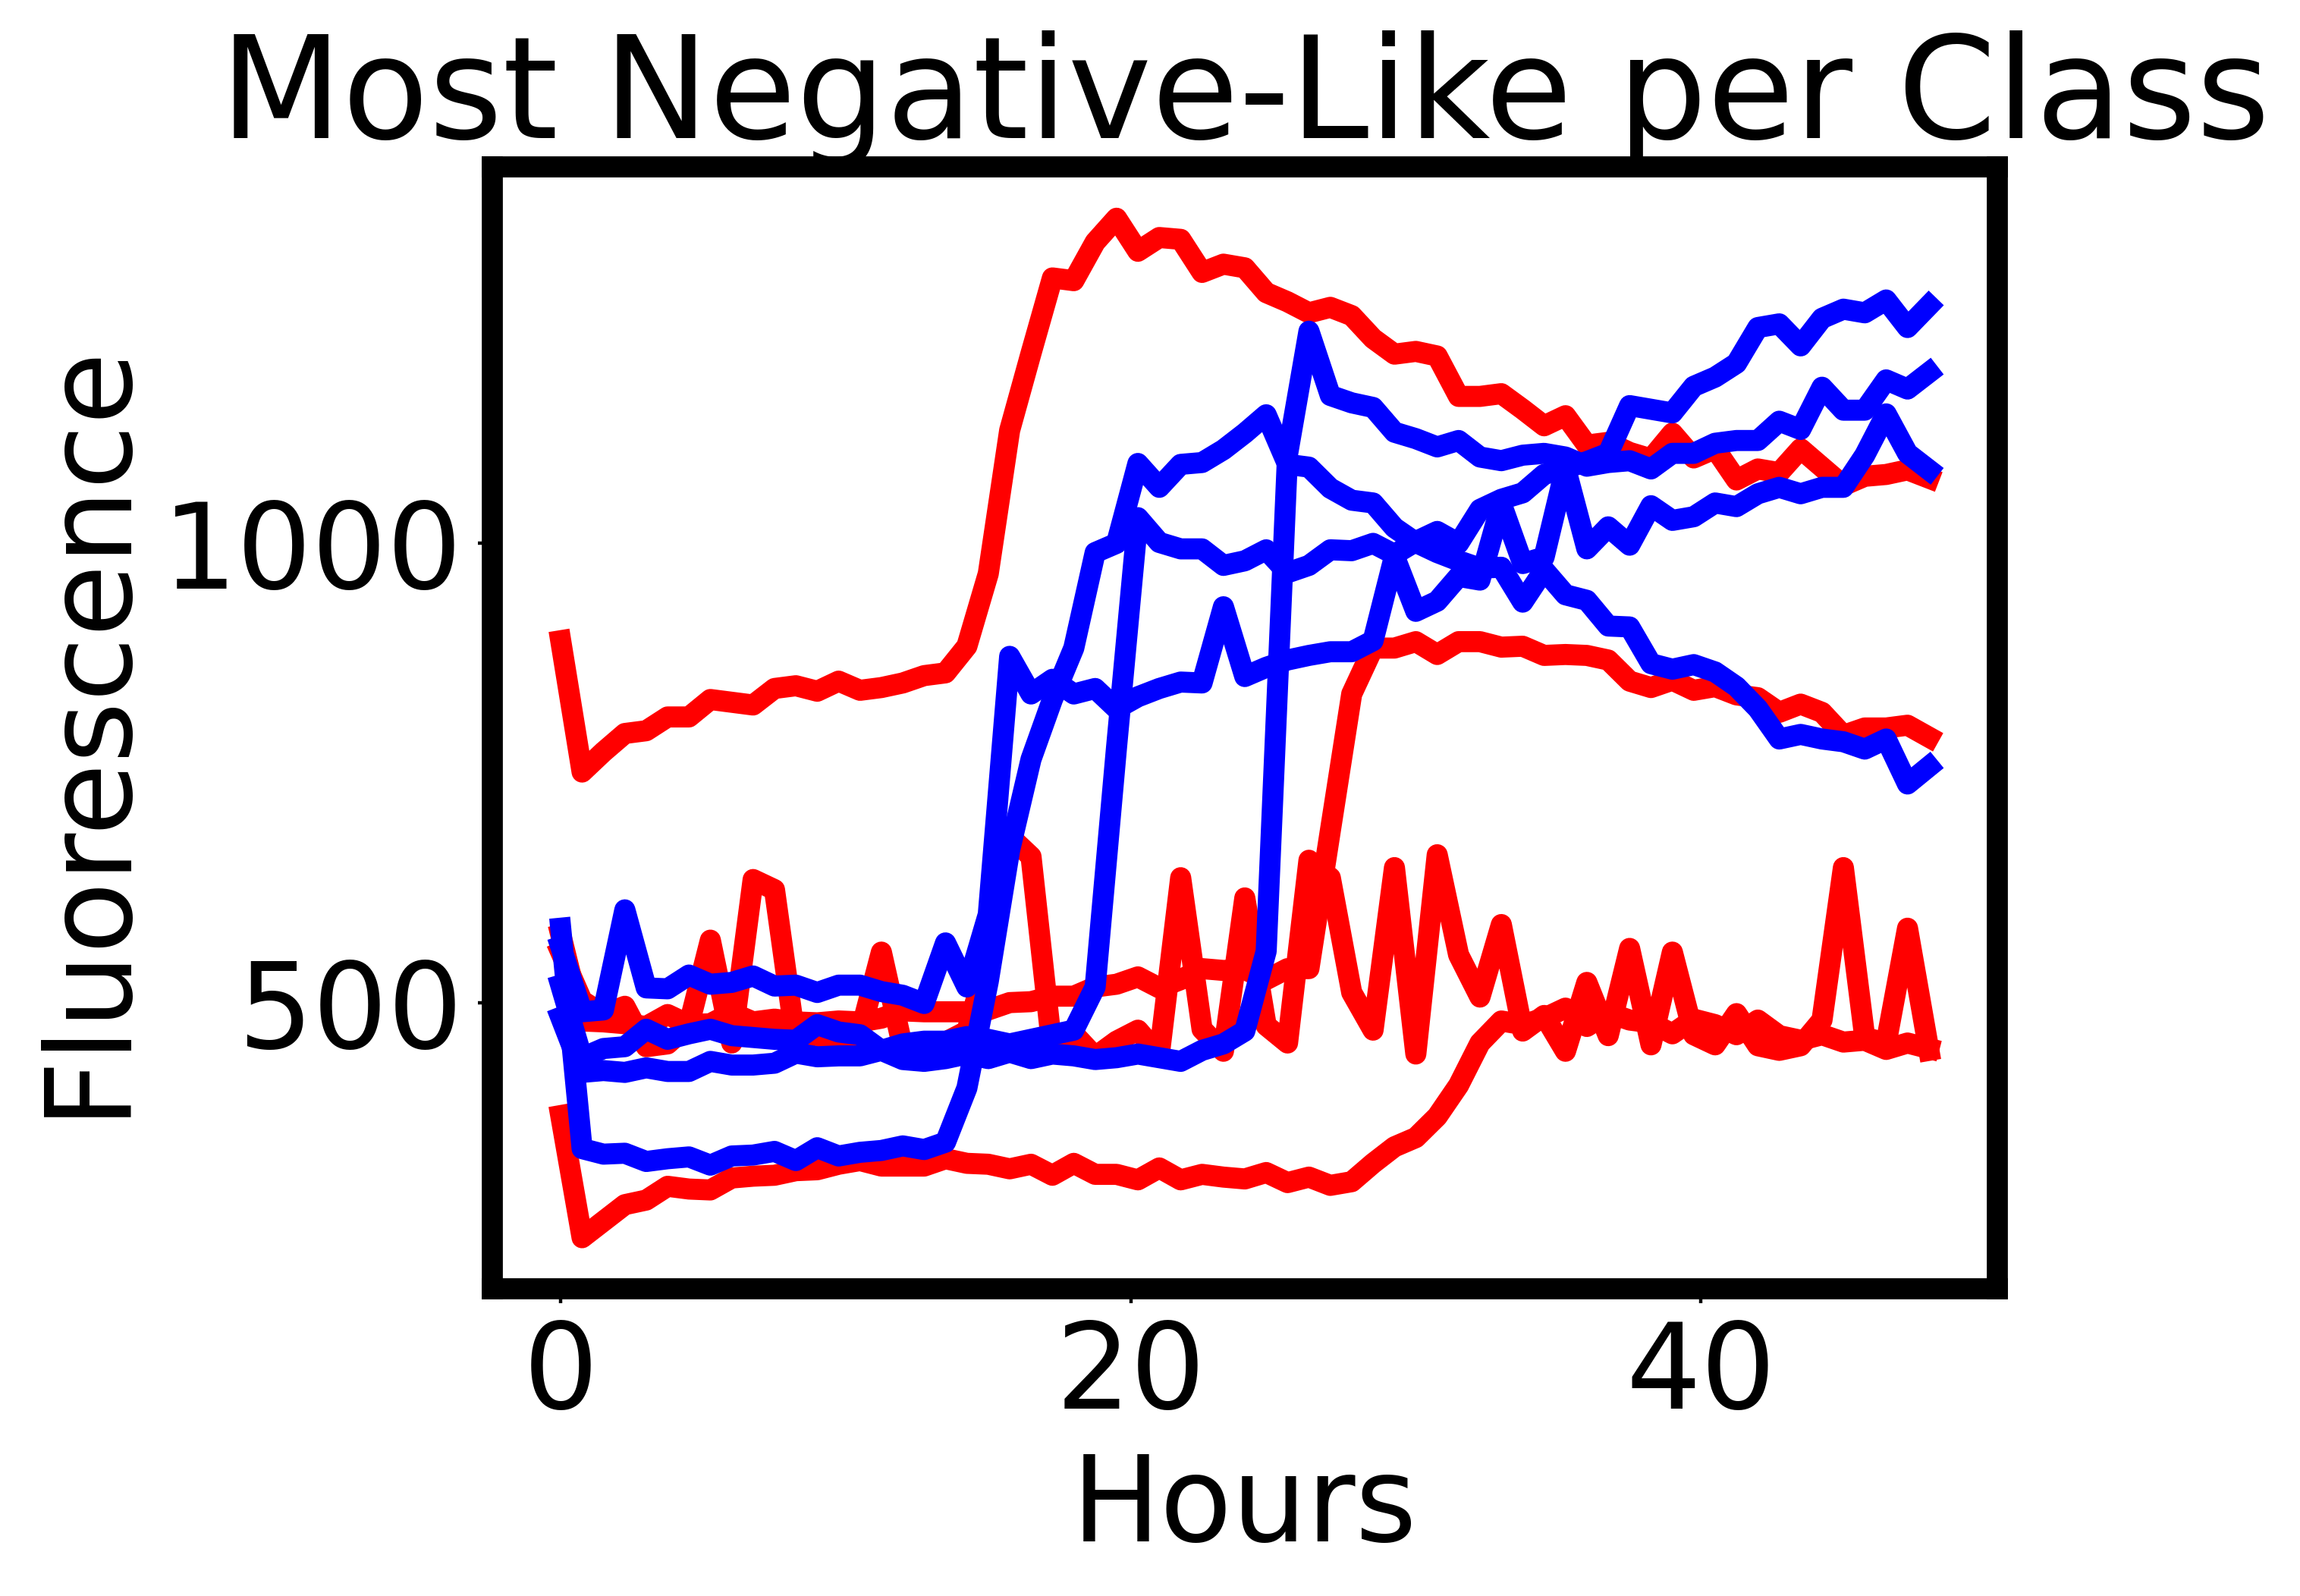

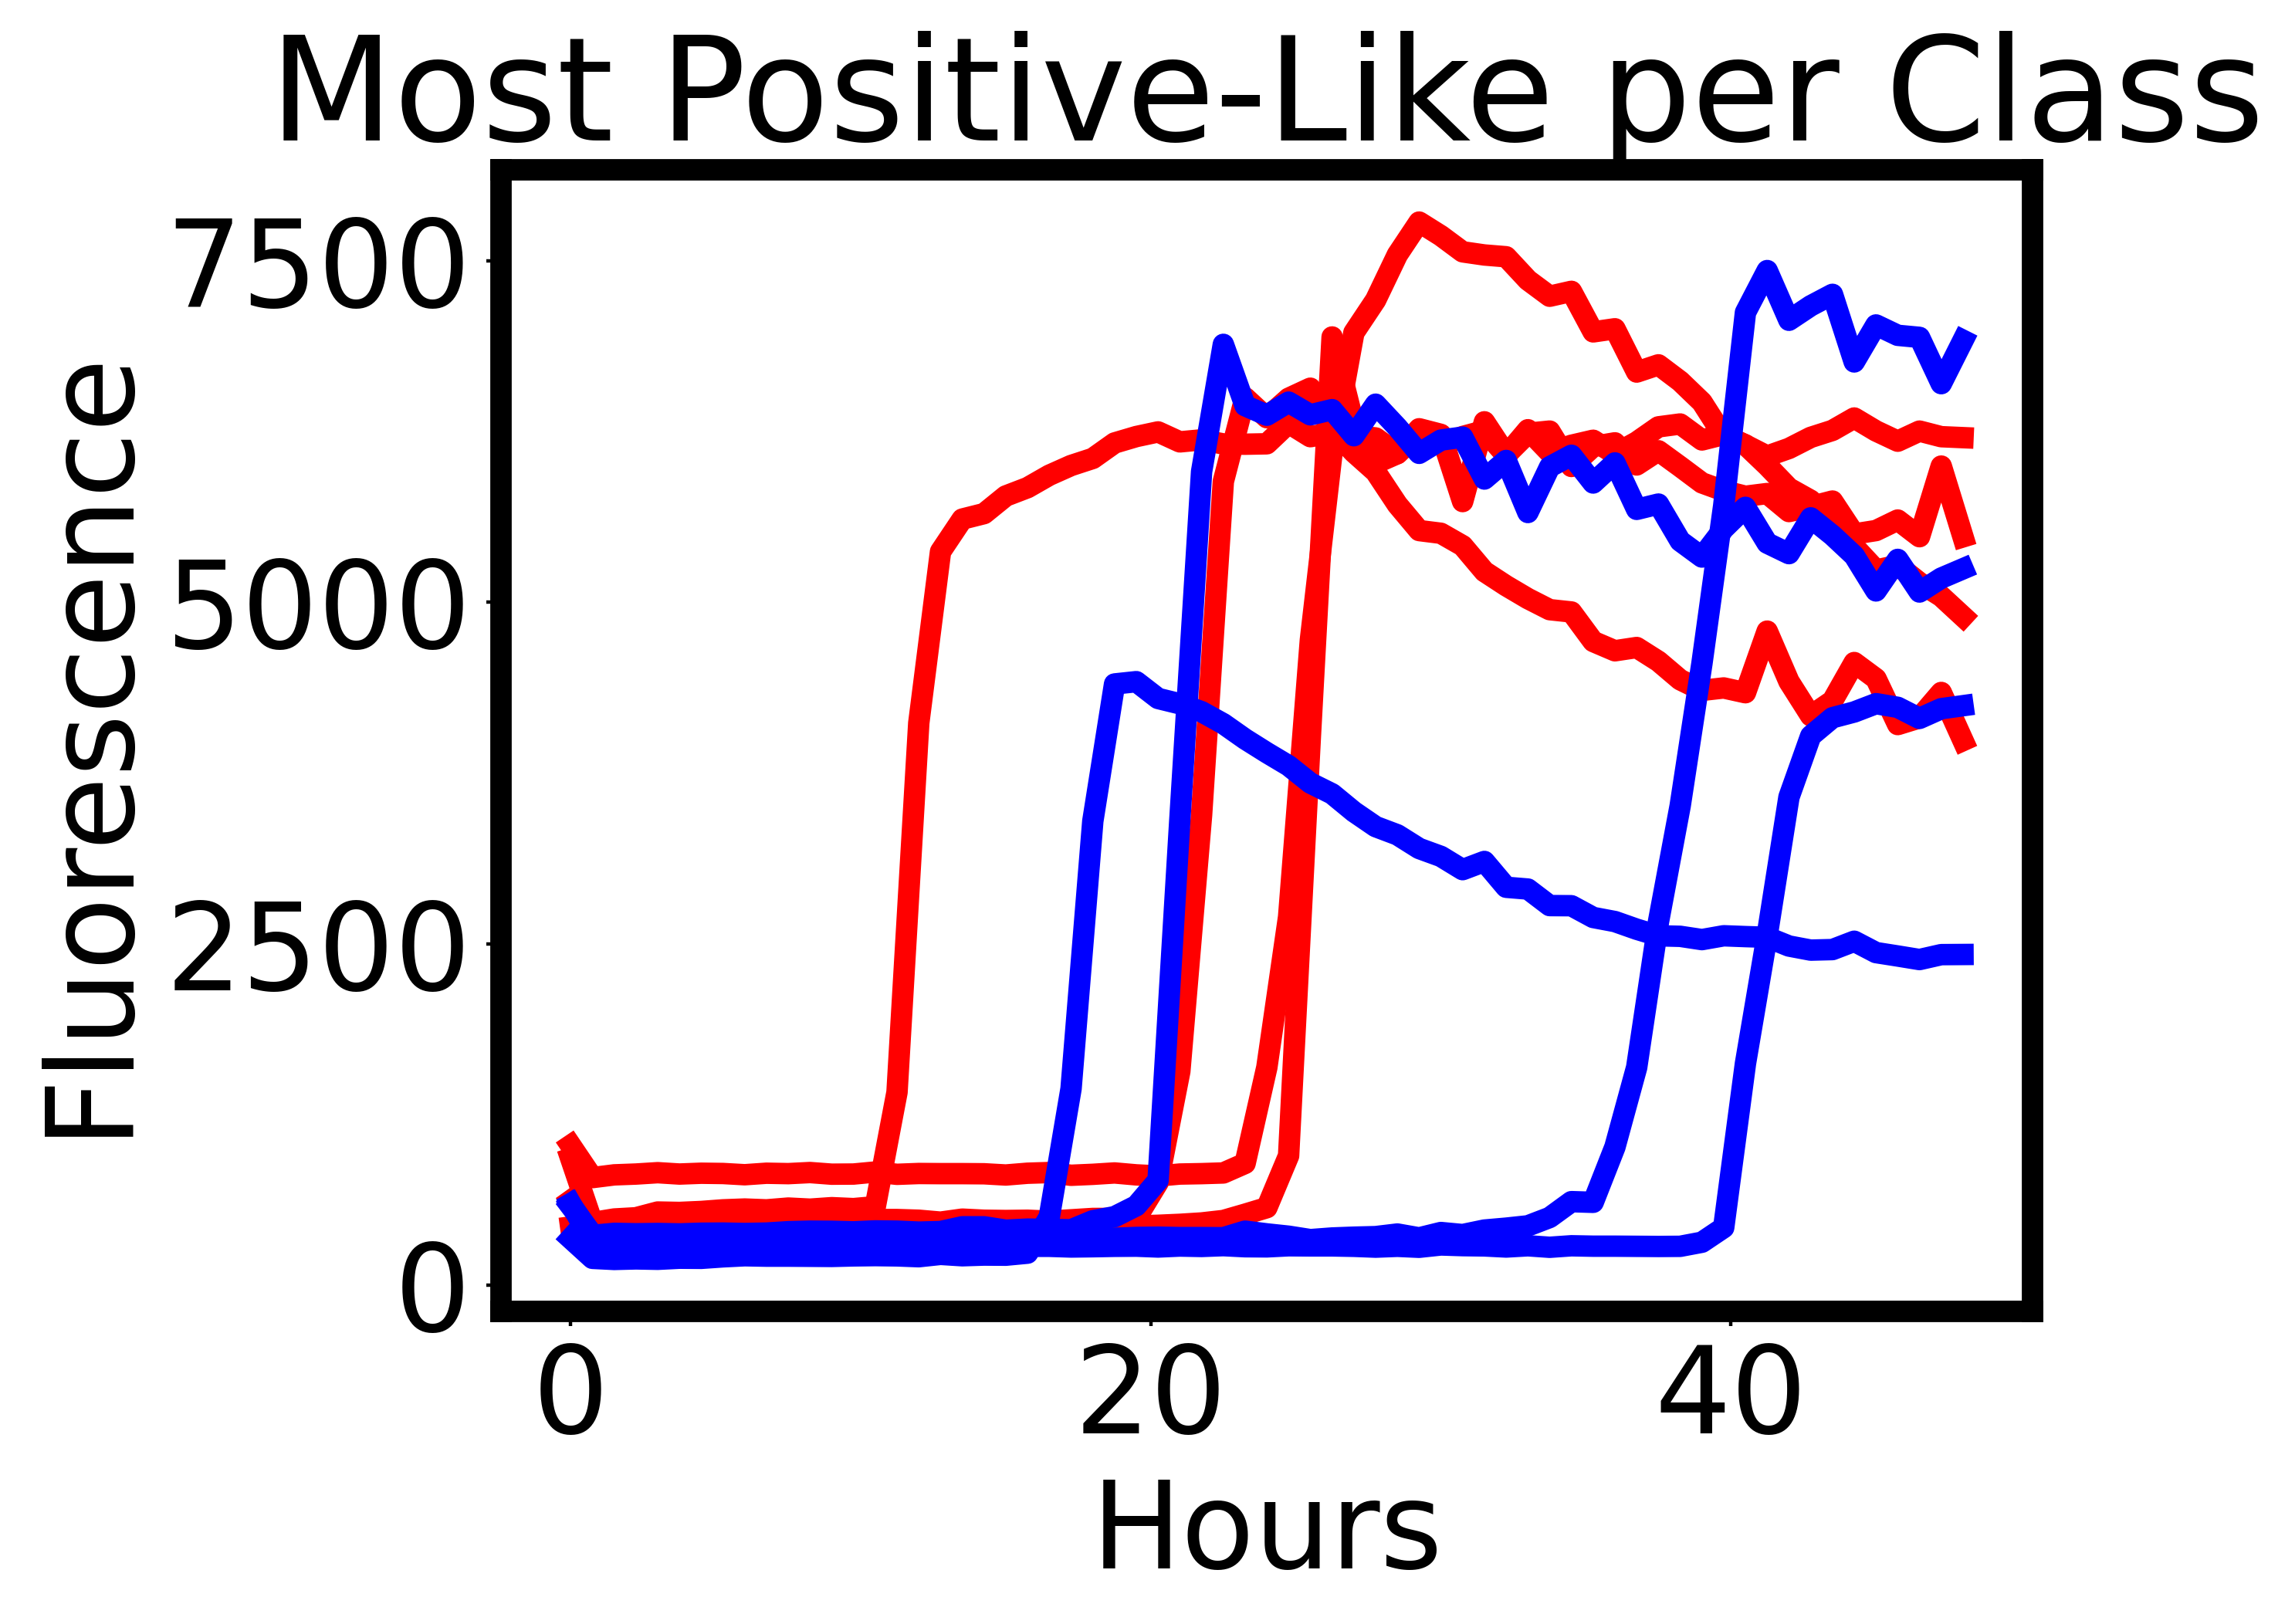

In [ ]:
### Plot Edge Cases
df = pd.read_csv('./Data/GrinderClean/combined_raw.csv')

## Raw Data
# Plot Negative-Like Samples
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '308G_7'].drop(columns='content_replicate')), c = 'red')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '122Gx01_3'].drop(columns='content_replicate')), c = 'red')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '15KB_2'].drop(columns='content_replicate')), c = 'red')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '259Gx01_6'].drop(columns='content_replicate')), c = 'red')

plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '428Gx01_7'].drop(columns='content_replicate')), c = 'b')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '163Gx01_4'].drop(columns='content_replicate')), c = 'b')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '159Gx01_2'].drop(columns='content_replicate')), c = 'b')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '266Gx01_8'].drop(columns='content_replicate')), c = 'b')

plt.title('Most Negative-Like per Class')
plt.ylabel('Fluorescence')
plt.xlabel('Hours')
plt.show()

# Plot Positive-Like Samples
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '6Px01_4'].drop(columns='content_replicate')), c = 'red')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '123G_1'].drop(columns='content_replicate')), c = 'red')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '38Gx01_3'].drop(columns='content_replicate')), c = 'red')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '123G_4'].drop(columns='content_replicate')), c = 'red')

plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '70Px01_3'].drop(columns='content_replicate')), c = 'b')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '70Px02_4'].drop(columns='content_replicate')), c = 'b')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '65Px01_1'].drop(columns='content_replicate')), c = 'b')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '367G_1'].drop(columns='content_replicate')), c = 'b')

plt.title('Most Positive-Like per Class')
plt.ylabel('Fluorescence')
plt.xlabel('Hours')
plt.show()


## Metrics Data
# Plot Negative-Like Samples
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '391G_4'].drop(columns='content_replicate')), c = 'red')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '13KB_1'].drop(columns='content_replicate')), c = 'red')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '15KB_3'].drop(columns='content_replicate')), c = 'red')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '249Gx01_7'].drop(columns='content_replicate')), c = 'red')

plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '309KB_1'].drop(columns='content_replicate')), c = 'b')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '309KB_4'].drop(columns='content_replicate')), c = 'b')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '308KB_3'].drop(columns='content_replicate')), c = 'b')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '19G_5'].drop(columns='content_replicate')), c = 'b')

plt.title('Most Negative-Like per Class')
plt.ylabel('Fluorescence')
plt.xlabel('Hours')
plt.show()

# Plot Positive-Like Samples
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '72Px03_3'].drop(columns='content_replicate')), c = 'red')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '453Gx01_2'].drop(columns='content_replicate')), c = 'red')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '21Px03_2'].drop(columns='content_replicate')), c = 'red')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '18Px03_3'].drop(columns='content_replicate')), c = 'red')

plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '61GC_1'].drop(columns='content_replicate')), c = 'b')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '31G_6'].drop(columns='content_replicate')), c = 'b')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '97Gx01_5'].drop(columns='content_replicate')), c = 'b')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '55GCx01_2'].drop(columns='content_replicate')), c = 'b')

plt.title('Most Positive-Like per Class')
plt.ylabel('Fluorescence')
plt.xlabel('Hours')
plt.show()

In [ ]:
from tensorflow import keras
model = keras.models.load_model('./SavedModels/Raw/mlp.h5')
keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=False,
    rankdir="TB",
    expand_nested=False,
    dpi=200,
    show_layer_activations=True,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
